In [1]:
import sys
sys.path.append('..')

In [2]:
from siggi import siggi, filters, spectra, calcIG, plotting
from siggi import Sed
from siggi.lsst_utils import Bandpass, BandpassDict, PhotometricParameters
from siggi import _siggiBase
from CMNN_Photoz_Estimator.cmnn_photoz import return_photoz
from astropy.cosmology import WMAP9 as cosmo
from CMNN_Photoz_Estimator.cmnn_analysis import get_stats
from siggi.filters import filterFactory
import matplotlib.pyplot as plt
import numpy as np
import os
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from scipy.stats import chi2

In [4]:
import pickle
import random

In [5]:
import sncosmo
import seaborn as sbs
sbs.set()
from copy import deepcopy

In [6]:
band = sncosmo.get_bandpass('lsstr')

source:
  class      : SALT2Source
  name       : 'salt2-extended'
  version    : 2.0
  phases     : [-20, .., 50] days
  wavelengths: [1700, .., 24990] Angstroms
parameters:
  z  = 0.0
  t0 = 0.0
  x0 = 6.133117237838639e-06
  x1 = 0.0
  c  = 0.0


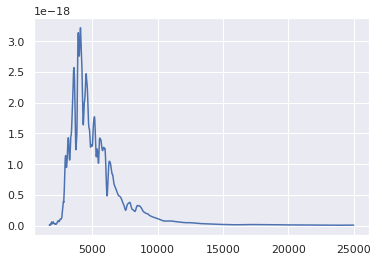

In [7]:
#def model
model_salt2 = sncosmo.Model(source='salt2-extended')
#model_salt2 = sncosmo.Model(source='salt2')
model_salt2.set(z=0, t0=0.)#, amplitude=1.e-10)
model_salt2.set_source_peakmag(23.7, band, 'ab')

wave = np.arange(1700., 24990., 0.1)
print(model_salt2)
plt.plot(wave,model_salt2.flux(0., wave))

In [8]:
model_salt2.bandmag('lsstu', 'ab', [10., 20.])

array([24.78856923, 26.12146107])

In [9]:
salt2_spec = Sed()
salt2_spec.setSED(wavelen=wave/10., flambda=model_salt2.flux(0., wave))

In [10]:
salt2_spec.wavelen

array([ 170.  ,  170.01,  170.02, ..., 2498.97, 2498.98, 2498.99])

source:
  class      : SALT2Source
  name       : 'salt2-extended'
  version    : 2.0
  phases     : [-20, .., 50] days
  wavelengths: [1700, .., 24990] Angstroms
parameters:
  z  = 0.0
  t0 = 5.0
  x0 = 6.133117237838639e-06
  x1 = 0.0
  c  = 0.0


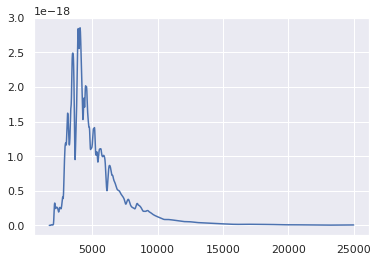

In [11]:
#def model
model_salt2_05 = sncosmo.Model(source='salt2-extended')
#model_salt2 = sncosmo.Model(source='salt2')
model_salt2_05.set(z=0, t0=5.)#, amplitude=1.e-10)
model_salt2_05.set_source_peakmag(23.7, band, 'ab')

wave = np.arange(1700., 24990., 0.1)
print(model_salt2_05)
plt.plot(wave,model_salt2_05.flux(0., wave))

In [12]:
model_salt2_05.bandmag('lsstu', 'ab', [10., 20.])

array([24.30914827, 25.45667618])

In [13]:
salt2_05_spec = Sed()
salt2_05_spec.setSED(wavelen=wave/10., flambda=model_salt2_05.flux(0., wave))

In [14]:
salt2_05_spec.wavelen

array([ 170.  ,  170.01,  170.02, ..., 2498.97, 2498.98, 2498.99])

source:
  class      : SALT2Source
  name       : 'salt2-extended'
  version    : 2.0
  phases     : [-20, .., 50] days
  wavelengths: [1700, .., 24990] Angstroms
parameters:
  z  = 0.0
  t0 = -5.0
  x0 = 6.133117237838639e-06
  x1 = 0.0
  c  = 0.0


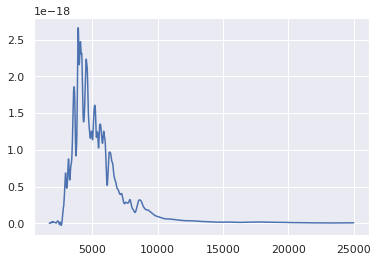

In [15]:
#def model
model_salt2_neg05 = sncosmo.Model(source='salt2-extended')
#model_salt2 = sncosmo.Model(source='salt2')
model_salt2_neg05.set(z=0, t0=-5.)#, amplitude=1.e-10)
model_salt2_neg05.set_source_peakmag(23.7, band, 'ab')

wave = np.arange(1700., 24990., 0.1)
print(model_salt2_neg05)
plt.plot(wave,model_salt2_neg05.flux(0., wave))

In [16]:
model_salt2_neg05.bandmag('lsstu', 'ab', [10., 20.])

array([25.45667618, 26.6107712 ])

In [17]:
salt2_neg05_spec = Sed()
salt2_neg05_spec.setSED(wavelen=wave/10., flambda=model_salt2_neg05.flux(0., wave))

In [18]:
salt2_neg05_spec.wavelen

array([ 170.  ,  170.01,  170.02, ..., 2498.97, 2498.98, 2498.99])

source:
  class      : TimeSeriesSource
  name       : 'snana-2007pg'
  version    : 2.0
  phases     : [-33.1, .., 76] days
  wavelengths: [2230, .., 25000] Angstroms
parameters:
  z         = 0.0
  t0        = 0.0
  amplitude = 1.092608467736339e-17


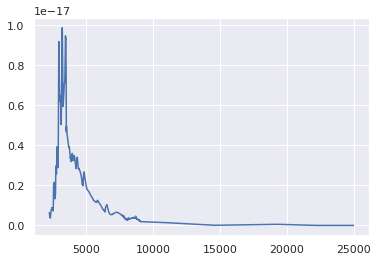

In [19]:
model_sna7pg = sncosmo.Model(source='snana-2007pg')
model_sna7pg.set(z=0, t0=0)
model_sna7pg.set_source_peakmag(23.7, band, 'ab')
model_sna7pg.bandmag('lsstu', 'ab', [10., 20.])

wavesna7pg = np.arange(2230., 25000., 0.1)
print(model_sna7pg)
plt.plot(wavesna7pg,model_sna7pg.flux(0., wavesna7pg))

In [20]:
sna7pg_spec = Sed()
sna7pg_spec.setSED(wavelen=wavesna7pg/10., flambda=model_sna7pg.flux(0., wavesna7pg))

source:
  class      : TimeSeriesSource
  name       : 's11-2006jl'
  version    : 1.0
  phases     : [-18, .., 60] days
  wavelengths: [1000, .., 14900] Angstroms
parameters:
  z         = 0.0
  t0        = 0.0
  amplitude = 2.7487039795269823e-17


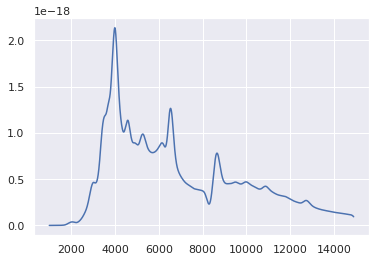

In [21]:
model_sna7pgnew = sncosmo.Model(source='s11-2006jl')
model_sna7pgnew.set(z=0, t0=0)
model_sna7pgnew.set_source_peakmag(23.7, band, 'ab')
model_sna7pgnew.bandmag('lsstu', 'ab', [10., 20.])
print(model_sna7pgnew)
wavesna7pgnew = np.arange(1000., 14900., 0.1)
plt.plot(wavesna7pgnew,model_sna7pgnew.flux(0., wavesna7pgnew))

In [22]:
sna7pg_specnew = Sed()
sna7pg_specnew.setSED(wavelen=wavesna7pgnew/10., flambda=model_sna7pgnew.flux(0., wavesna7pgnew))

source:
  class      : TimeSeriesSource
  name       : 's11-2006jl'
  version    : 1.0
  phases     : [-18, .., 60] days
  wavelengths: [1000, .., 14900] Angstroms
parameters:
  z         = 0.0
  t0        = -5.0
  amplitude = 2.7487039795269823e-17


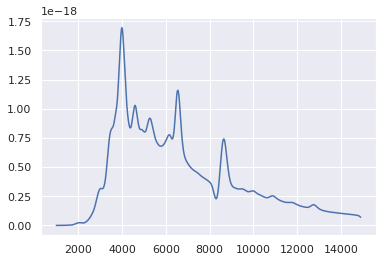

In [23]:
model_sna7pgnew_neg05 = sncosmo.Model(source='s11-2006jl')
model_sna7pgnew_neg05.set(z=0, t0=-5.)
model_sna7pgnew_neg05.set_source_peakmag(23.7, band, 'ab')
model_sna7pgnew_neg05.bandmag('lsstu', 'ab', [10., 20.])
print(model_sna7pgnew_neg05)
wavesna7pgnew_neg05 = np.arange(1000., 14900., 0.1)
plt.plot(wavesna7pgnew_neg05,model_sna7pgnew_neg05.flux(0., wavesna7pgnew_neg05))

In [24]:
sna7pg_specnew_neg05 = Sed()
sna7pg_specnew_neg05.setSED(wavelen=wavesna7pgnew_neg05/10., flambda=model_sna7pgnew_neg05.flux(0., wavesna7pgnew_neg05))

source:
  class      : TimeSeriesSource
  name       : 's11-2006jl'
  version    : 1.0
  phases     : [-18, .., 60] days
  wavelengths: [1000, .., 14900] Angstroms
parameters:
  z         = 0.0
  t0        = 5.0
  amplitude = 2.7487039795269823e-17


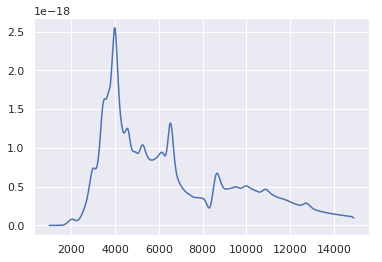

In [25]:
model_sna7pgnew_05 = sncosmo.Model(source='s11-2006jl')
model_sna7pgnew_05.set(z=0, t0=5.)
model_sna7pgnew_05.set_source_peakmag(23.7, band, 'ab')
model_sna7pgnew_05.bandmag('lsstu', 'ab', [10., 20.])
print(model_sna7pgnew_05)
wavesna7pgnew_05 = np.arange(1000., 14900., 0.1)
plt.plot(wavesna7pgnew_05,model_sna7pgnew_05.flux(0., wavesna7pgnew_05))

In [26]:
sna7pg_specnew_05 = Sed()
sna7pg_specnew_05.setSED(wavelen=wavesna7pgnew_05/10., flambda=model_sna7pgnew_05.flux(0., wavesna7pgnew_05))

In [27]:
bp_list = []
bp_dir = '../siggi/data/lsst_baseline_throughputs'
for filter_name in ['u', 'g', 'r', 'i', 'z', 'y']:
    current_bp = Bandpass()
    print(os.path.join(bp_dir, 'filter_%s.dat' % filter_name))
    current_bp.readThroughput(os.path.join(bp_dir, 'filter_%s.dat' % filter_name))
    bp_list.append(current_bp)

../siggi/data/lsst_baseline_throughputs/filter_u.dat
../siggi/data/lsst_baseline_throughputs/filter_g.dat
../siggi/data/lsst_baseline_throughputs/filter_r.dat
../siggi/data/lsst_baseline_throughputs/filter_i.dat
../siggi/data/lsst_baseline_throughputs/filter_z.dat
../siggi/data/lsst_baseline_throughputs/filter_y.dat


In [28]:
bp_dict = BandpassDict(bp_list, ['u', 'g', 'r', 'i', 'z', 'y'])
print(bp_dict['u'])

In [29]:
frozen_dict = BandpassDict.loadTotalBandpassesFromFiles(bandpassDir='../siggi/data/lsst_baseline_throughputs/')
frozen_dict = BandpassDict(frozen_dict.values()[1:3], frozen_dict.keys()[1:3])
print(frozen_dict.keys())

['g', 'r']


In [30]:
#all frozen
frozen_dict_all = BandpassDict.loadTotalBandpassesFromFiles(bandpassDir='../siggi/data/lsst_baseline_throughputs/')
frozen_dict_all = BandpassDict(frozen_dict_all.values()[:6], frozen_dict_all.keys()[:6])
print(frozen_dict_all.keys())

['u', 'g', 'r', 'i', 'z', 'y']


In [31]:
f_norm = salt2_spec.calcFluxNorm(22., bp_dict['r'])
salt2_spec.multiplyFluxNorm(f_norm)
print(f_norm)

48.138138124259825


In [32]:
#copies
cpsalt2_spec_05 = deepcopy(salt2_spec)
cpsalt2_spec_05.redshiftSED(0.05)
cpsalt2_spec_10 = deepcopy(salt2_spec)
cpsalt2_spec_10.redshiftSED(0.10)
cpsalt2_spec_15 = deepcopy(salt2_spec)
cpsalt2_spec_15.redshiftSED(0.15)
cpsalt2_spec_20 = deepcopy(salt2_spec)
cpsalt2_spec_20.redshiftSED(0.20)
cpsalt2_spec_25 = deepcopy(salt2_spec)
cpsalt2_spec_25.redshiftSED(0.25)
cpsalt2_spec_30 = deepcopy(salt2_spec)
cpsalt2_spec_30.redshiftSED(0.30)
cpsalt2_spec_35 = deepcopy(salt2_spec)
cpsalt2_spec_35.redshiftSED(0.35)
cpsalt2_spec_40 = deepcopy(salt2_spec)
cpsalt2_spec_40.redshiftSED(0.40)
cpsalt2_spec_45 = deepcopy(salt2_spec)
cpsalt2_spec_45.redshiftSED(0.45)
cpsalt2_spec_50 = deepcopy(salt2_spec)
cpsalt2_spec_50.redshiftSED(0.50)
cpsalt2_spec_55 = deepcopy(salt2_spec)
cpsalt2_spec_55.redshiftSED(0.55)
cpsalt2_spec_60 = deepcopy(salt2_spec)
cpsalt2_spec_60.redshiftSED(0.60)
cpsalt2_spec_65 = deepcopy(salt2_spec)
cpsalt2_spec_65.redshiftSED(0.65)
cpsalt2_spec_70 = deepcopy(salt2_spec)
cpsalt2_spec_70.redshiftSED(0.70)
cpsalt2_spec_75 = deepcopy(salt2_spec)
cpsalt2_spec_75.redshiftSED(0.75)
cpsalt2_spec_80 = deepcopy(salt2_spec)
cpsalt2_spec_80.redshiftSED(0.80)
cpsalt2_spec_85 = deepcopy(salt2_spec)
cpsalt2_spec_85.redshiftSED(0.85)
cpsalt2_spec_90 = deepcopy(salt2_spec)
cpsalt2_spec_90.redshiftSED(0.90)
cpsalt2_spec_95 = deepcopy(salt2_spec)
cpsalt2_spec_95.redshiftSED(0.95)
cpsalt2_spec_max = deepcopy(salt2_spec)
cpsalt2_spec_max.redshiftSED(1.0)

In [33]:
#list of SED and copies
SEDS = [salt2_spec, cpsalt2_spec_05, cpsalt2_spec_10, cpsalt2_spec_15, cpsalt2_spec_20, cpsalt2_spec_25, cpsalt2_spec_30, cpsalt2_spec_35, cpsalt2_spec_40, cpsalt2_spec_45, cpsalt2_spec_50, cpsalt2_spec_55, cpsalt2_spec_60, cpsalt2_spec_65, cpsalt2_spec_70, cpsalt2_spec_75, cpsalt2_spec_80, cpsalt2_spec_85, cpsalt2_spec_90, cpsalt2_spec_95, cpsalt2_spec_max]

In [34]:
d_lambda = 25.
x = np.arange(375., 1026., d_lambda)
point_list = []
for val_1 in x:
    for val_2 in x:
        point_list.append([val_1, val_2])
y = np.arange(387.5, 1026., d_lambda)
for val_1 in y:
    point_list.append([val_1, val_1])

In [35]:
ref_filter = bp_dict['r']

In [36]:
#f = filters()
#s = spectra()

In [37]:
new_phot_params = {}

new_phot_params['filter_0'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['filter_1'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['filter_2'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['filter_3'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['filter_4'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['filter_5'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['filter_6'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['filter_7'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['filter_8'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['filter_9'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['filter_10'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['filter_11'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['filter_12'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['filter_13'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['filter_14'] = PhotometricParameters(nexp=2, bandpass='any')


new_phot_params['u']  = PhotometricParameters(nexp=2, bandpass='u')
new_phot_params['g']  = PhotometricParameters(nexp=2, bandpass='g')
new_phot_params['r']  = PhotometricParameters(nexp=2, bandpass='r')
new_phot_params['i']  = PhotometricParameters(nexp=2, bandpass='i')
new_phot_params['z']  = PhotometricParameters(nexp=2, bandpass='z')
new_phot_params['y']  = PhotometricParameters(nexp=2, bandpass='y')

new_phot_params['mix1a'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['mix1b'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['mix1c'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['mix1d'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['mix1e'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['mix1f'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['mix1g'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['mix1h'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['mix1i'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['mix1j'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['mix1k'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['mix1l'] = PhotometricParameters(nexp=2, bandpass='any')

new_phot_params['salt2a'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt2b'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt2c'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt2d'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt2e'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt2f'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt2g'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt2h'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt2i'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt2j'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt2k'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt2l'] = PhotometricParameters(nexp=2, bandpass='any')

new_phot_params['salt3a'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt3b'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt3c'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt3d'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt3e'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt3f'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt3g'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt3h'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt3i'] = PhotometricParameters(nexp=2, bandpass='any')

new_phot_params['salt4a'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt4b'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt4c'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt4d'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt4e'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt4f'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt4g'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt4h'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt4i'] = PhotometricParameters(nexp=2, bandpass='any')

new_phot_params['salt5a'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt5b'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt5c'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt5d'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt5e'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt5f'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt5g'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt5h'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt5i'] = PhotometricParameters(nexp=2, bandpass='any')

new_phot_params['salt6a'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt6b'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt6c'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt6d'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt6e'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt6f'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt6g'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt6h'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt6i'] = PhotometricParameters(nexp=2, bandpass='any')

new_phot_params['salt7a'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt7b'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt7c'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt7d'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt7e'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt7f'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt7g'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt7h'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['salt7i'] = PhotometricParameters(nexp=2, bandpass='any')


new_phot_params['91t1a'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['91t1b'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['91t1c'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['91t1d'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['91t1e'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['91t1f'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['91t1g'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['91t11h'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['91t1i'] = PhotometricParameters(nexp=2, bandpass='any')

new_phot_params['comb_filt_mix1'] = PhotometricParameters(nexp=2, bandpass='any')
new_phot_params['comb_filt_mix2'] = PhotometricParameters(nexp=2, bandpass='any')

In [38]:
def prior_z(z, z0=0.552):
    return (z**2.)*np.exp(-(z/z0)**2)/(np.sum((np.arange(0, 2.51, .05)**2.)*np.exp(-(np.arange(0, 2.51, .05)/z0)**2.)))

In [39]:
def flat_prior_2(z):
    z_out = np.ones(len(z))
    z_out[0] = 0.
    return z_out

In [40]:
#step funct, more weight for z < .5
def step_z_high(z):
    z_out = np.piecewise(z, [z <= .5, z > .5, z==0], [.1, 1, 0])
    return z_out
print(step_z_high((np.arange(0,1,.2))))

[0.  0.1 0.1 1.  1. ]


In [41]:
#step funct, more weight for z < .5
def step_z_low(z):
    z_out = np.piecewise(z, [z <= .5, z > .5, z == 0], [1, .1, 0])
    return z_out
print(step_z_low((np.arange(0,1,.2))))

[0.  1.  1.  0.1 0.1]


In [42]:
def step_z_tenth_low(z):
    z_out = np.piecewise(z, [z <= .1, z > .1, z == 0], [1, .2, 0])
    return z_out
print(step_z_tenth_low((np.arange(0,1,.05))))

[0.  1.  1.  0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2]


In [43]:
def step_z_ninetenth_high(z):
    z_out = np.piecewise(z, [z >= .9, z < .9, z == 0], [1, .2, 0])
    return z_out
print(step_z_ninetenth_high((np.arange(0,1,.05))))

[0.  0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 1.  1. ]


In [44]:
#def real_prior_z(z):
 #   z_out = np.piecewise(z, [z >= 1, z < 1, z == 0], [9.5e-5*(1+z)**(-0.25), 1.8e-5*(1+z)**(2.15), 0])
  #  return z_out
#print(real_prior_z((np.arange(0,2,.2))))

In [45]:
cosmo.differential_comoving_volume(np.arange(0,2,.2))

<Quantity [0.00000000e+00, 2.68632739e+09, 8.73493315e+09, 1.57974981e+10,
           2.24958364e+10, 2.82086026e+10, 3.27698300e+10, 3.62391832e+10,
           3.87652010e+10, 4.05155633e+10] Mpc3 / sr>

In [46]:
def real_prior_low_z(z):
    z_out = 1.8e-5*(1+z)**(2.15)*cosmo.differential_comoving_volume(z)
    z_out[0] = 0.
    return z_out
print(real_prior_low_z((np.arange(0,2,.2))))

[      0.           71560.13060468  324121.14737349  781121.83789791
 1432882.3606055  2253557.10652458 3213330.95439066 4284548.61810911
 5443863.70910811 6672431.96458998] Mpc3 / sr


In [47]:
a = real_prior_low_z((np.arange(0,.76,.038)))
print(np.median(a))

259913.12418194374 Mpc3 / sr


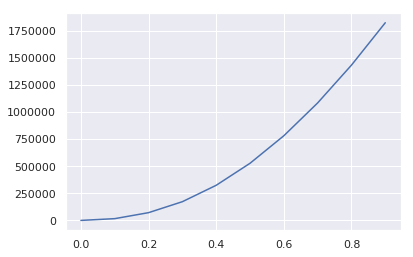

In [48]:
plt.plot(np.arange(0,1,.1),real_prior_low_z(np.arange(0,1,.1)))

In [49]:
p_cdf = 0
prior_cdf = []
for p_val in np.arange(0.0, 2.51, 0.001):
    p_cdf += prior_z(p_val)
    prior_cdf.append(p_cdf)

In [50]:
filt_edges = []
for point_loc in point_list:
    filt_edges.append([point_loc[0]-50., point_loc[0]+50., point_loc[1]-50., point_loc[1]+50.])

# Train Comb to Type Ia and II

In [51]:
#no frozen, 3 filters, real prior, 20nm
sig_example = siggi([salt2_spec,sna7pg_specnew], [1.0], real_prior_low_z, calib_filter=bp_dict['r'],
                    z_min=0.00, z_max=.76, z_steps=21, phot_params=new_phot_params, calib_mag=23.7)

In [52]:
test_rand_state = np.random.RandomState(2325)    
num_filters = 3
set_ratio = 1
res_mix1 = sig_example.optimize_filters(num_filters=num_filters,
                                     filt_min=300., filt_max=1100.,
                                     set_ratio=set_ratio,
                                     system_wavelen_max=1200.,
                                     n_opt_points=50,
                                     optimizer_verbosity=5,
                                     procs=1, acq_func_kwargs_dict={'kappa':1.8},
                                     #=frozen_dict_all, frozen_filt_eff_wavelen=[365., 477., 622., 765., 870., 1015],
                                     #starting_points = [[mid-50., mid+50., mid_2-50., mid_2+50.] for mid, mid_2 in point_list],
                                     starting_points = None,
                                     rand_state = test_rand_state,
                                     set_width = 20)


[[300.0, 690.0, 1080.0], [566.6666666666667, 823.3333333333334, 1080.0], [833.3333333333334, 956.6666666666667, 1080.0], [376.86514058556975, 501.91118594174134, 541.8013970009033], [418.40966345926034, 554.881055009717, 1018.3848730498541], [317.3853499502618, 472.1803977483952, 623.7248782788874], [476.5379008142483, 546.4069561954537, 664.12296761259], [534.2570740349437, 591.8741853766697, 749.6026837305512], [571.6284587949724, 988.0922628225737, 1047.035466964916], [333.71939669208973, 585.2142296109222, 811.267751567073]]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    8.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   20.1s finished


-0.5947432124958567 10
[487.8999999998291, 399.2999999999097, 432.8999999998791] [[477.8270697840512, 477.8270697840512, 497.8270697840512, 497.8270697840512], [389.21521553091395, 389.21521553091395, 409.21521553091395, 409.21521553091395], [422.81270150446846, 422.81270150446846, 442.81270150446846, 442.81270150446846]]
1
[494.3999999998232, 528.9999999997917, 683.1999999996515] [[484.38404255591104, 484.38404255591104, 504.38404255591104, 504.38404255591104], [518.9628544543561, 518.9628544543561, 538.9628544543561, 538.9628544543561], [673.1130206570442, 673.1130206570442, 693.1130206570442, 693.1130206570442]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s finished


-0.5947432124958567 11
[919.8999999994362, 1023.5999999993419, 702.6999999996337] [[909.8343368591783, 909.8343368591783, 929.8343368591783, 929.8343368591783], [1013.5520961170879, 1013.5520961170879, 1033.5520961170878, 1033.5520961170878], [692.6513423898832, 692.6513423898832, 712.6513423898832, 712.6513423898832]]
1
[1043.6999999993236, 556.3999999997668, 700.9999999996353] [[1033.6751733508058, 1033.6751733508058, 1053.6751733508058, 1053.6751733508058], [546.380040000752, 546.380040000752, 566.380040000752, 566.380040000752], [690.950213815127, 690.950213815127, 710.950213815127, 710.950213815127]]
2
[475.4999999998404, 609.8999999997181, 663.1999999996697] [[465.4097348392527, 465.4097348392527, 485.4097348392527, 485.4097348392527], [599.8398846807179, 599.8398846807179, 619.8398846807179, 619.8398846807179], [653.1785102204308, 653.1785102204308, 673.1785102204308, 673.1785102204308]]
3
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


-0.6003720102875838 12
[501.59999999981665, 1038.9999999993279, 636.1999999996942] [[491.54305630152203, 491.54305630152203, 511.54305630152203, 511.54305630152203], [1028.9898467082176, 1028.9898467082176, 1048.9898467082176, 1048.9898467082176], [626.1846951477676, 626.1846951477676, 646.1846951477676, 646.1846951477676]]
1
[475.3999999998405, 573.6999999997511, 655.7999999996764] [[465.38877585053353, 465.38877585053353, 485.38877585053353, 485.38877585053353], [563.6539415247377, 563.6539415247377, 583.6539415247377, 583.6539415247377], [645.7552959601123, 645.7552959601123, 665.7552959601123, 665.7552959601123]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


-0.6003720102875838 13
[476.5999999998394, 612.3999999997159, 669.9999999996635] [[466.56206338423397, 466.56206338423397, 486.56206338423397, 486.56206338423397], [602.3683421311183, 602.3683421311183, 622.3683421311183, 622.3683421311183], [659.9633303469427, 659.9633303469427, 679.9633303469427, 679.9633303469427]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


-0.6172897201990661 14
[472.2999999998433, 615.3999999997131, 676.5999999996575] [[462.29877684241734, 462.29877684241734, 482.29877684241734, 482.29877684241734], [605.3873752616553, 605.3873752616553, 625.3873752616553, 625.3873752616553], [666.5412431316331, 666.5412431316331, 686.5412431316331, 686.5412431316331]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


-0.621782543523349 15
[435.8999999998764, 594.2999999997323, 678.6999999996556] [[425.88418865192875, 425.88418865192875, 445.88418865192875, 445.88418865192875], [584.2473316669148, 584.2473316669148, 604.2473316669148, 604.2473316669148], [668.6296307654417, 668.6296307654417, 688.6296307654417, 688.6296307654417]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


-0.621782543523349 16
[551.6999999997711, 626.0999999997034, 676.7999999996573] [[541.6745797864461, 541.6745797864461, 561.6745797864461, 561.6745797864461], [616.0368191387647, 616.0368191387647, 636.0368191387647, 636.0368191387647], [666.7108492466737, 666.7108492466737, 686.7108492466737, 686.7108492466737]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


-0.621782543523349 17
[474.799999999841, 651.3999999996804, 670.7999999996628] [[464.75306793592347, 464.75306793592347, 484.75306793592347, 484.75306793592347], [641.3551230324512, 641.3551230324512, 661.3551230324512, 661.3551230324512], [660.7846978178986, 660.7846978178986, 680.7846978178986, 680.7846978178986]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


-0.621782543523349 18
[483.3999999998332, 592.7999999997337, 680.5999999996538] [[473.37455973204976, 473.37455973204976, 493.37455973204976, 493.37455973204976], [582.7486633834781, 582.7486633834781, 602.7486633834781, 602.7486633834781], [670.5476675790674, 670.5476675790674, 690.5476675790674, 690.5476675790674]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


-0.621782543523349 19
[413.29999999989695, 457.49999999985675, 670.3999999996631] [[403.214967415056, 403.214967415056, 423.214967415056, 423.214967415056], [447.4038352377671, 447.4038352377671, 467.4038352377671, 467.4038352377671], [660.3489303100273, 660.3489303100273, 680.3489303100273, 680.3489303100273]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


-0.621782543523349 20
[470.79999999984466, 441.6999999998711, 669.9999999996635] [[460.79950064046676, 460.79950064046676, 480.79950064046676, 480.79950064046676], [431.60664609772357, 431.60664609772357, 451.60664609772357, 451.60664609772357], [659.9920746496105, 659.9920746496105, 679.9920746496105, 679.9920746496105]]
1
[476.6999999998393, 622.6999999997065, 743.6999999995965] [[466.65323596580885, 466.65323596580885, 486.65323596580885, 486.65323596580885], [612.600769952764, 612.600769952764, 632.600769952764, 632.600769952764], [733.6646418587491, 733.6646418587491, 753.6646418587491, 753.6646418587491]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


-0.621782543523349 21
[398.99999999990996, 480.299999999836, 711.2999999996259] [[388.9778402963827, 388.9778402963827, 408.9778402963827, 408.9778402963827], [470.2531549111661, 470.2531549111661, 490.2531549111661, 490.2531549111661], [701.2798027116432, 701.2798027116432, 721.2798027116432, 721.2798027116432]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


-0.621782543523349 22
[387.99999999991996, 435.5999999998767, 668.6999999996647] [[377.9973769812274, 377.9973769812274, 397.9973769812274, 397.9973769812274], [425.5128325544674, 425.5128325544674, 445.5128325544674, 445.5128325544674], [658.6613608069893, 658.6613608069893, 678.6613608069893, 678.6613608069893]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


-0.621782543523349 23
[477.29999999983875, 621.9999999997071, 669.1999999996642] [[467.2131883344265, 467.2131883344265, 487.2131883344265, 487.2131883344265], [611.9481488610131, 611.9481488610131, 631.9481488610131, 631.9481488610131], [659.1513571579862, 659.1513571579862, 679.1513571579862, 679.1513571579862]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


-0.621782543523349 24
[468.0999999998471, 622.5999999997066, 621.7999999997073] [[458.0015142254671, 458.0015142254671, 478.0015142254671, 478.0015142254671], [612.5654277996248, 612.5654277996248, 632.5654277996248, 632.5654277996248], [611.7739619012527, 611.7739619012527, 631.7739619012527, 631.7739619012527]]
1
[467.59999999984757, 605.8999999997218, 672.8999999996608] [[457.5227102636769, 457.5227102636769, 477.5227102636769, 477.5227102636769], [595.8961145511728, 595.8961145511728, 615.8961145511728, 615.8961145511728], [662.8286032309948, 662.8286032309948, 682.8286032309948, 682.8286032309948]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


-0.621782543523349 25
[336.89999999996644, 602.4999999997249, 681.7999999996528] [[326.8686791184163, 326.8686791184163, 346.8686791184163, 346.8686791184163], [592.4115396356789, 592.4115396356789, 612.4115396356789, 612.4115396356789], [671.7187562487899, 671.7187562487899, 691.7187562487899, 691.7187562487899]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


-0.621782543523349 26
[407.0999999999026, 490.79999999982647, 677.7999999996564] [[397.0112806341448, 397.0112806341448, 417.0112806341448, 417.0112806341448], [480.76441562565685, 480.76441562565685, 500.76441562565685, 500.76441562565685], [667.7982452940043, 667.7982452940043, 687.7982452940043, 687.7982452940043]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


-0.621782543523349 27
[515.0999999998044, 547.9999999997744, 670.1999999996633] [[505.00846519920555, 505.0084651992056, 525.0084651992056, 525.0084651992056], [537.976908593524, 537.976908593524, 557.976908593524, 557.976908593524], [660.1341813097782, 660.1341813097782, 680.1341813097782, 680.1341813097782]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


-0.621782543523349 28
[458.69999999985566, 621.4999999997076, 678.2999999996559] [[448.63784002577677, 448.63784002577677, 468.63784002577677, 468.63784002577677], [611.4129191553513, 611.4129191553513, 631.4129191553513, 631.4129191553513], [668.2234710920495, 668.2234710920495, 688.2234710920495, 688.2234710920495]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


-0.621782543523349 29
[513.299999999806, 545.6999999997765, 682.1999999996524] [[503.20338924255446, 503.2033892425545, 523.2033892425545, 523.2033892425545], [535.6609793533397, 535.6609793533397, 555.6609793533397, 555.6609793533397], [672.1259625737052, 672.1259625737052, 692.1259625737052, 692.1259625737052]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


-0.621782543523349 30
[524.4999999997958, 532.6999999997884, 684.2999999996505] [[514.4548902451066, 514.4548902451066, 534.4548902451066, 534.4548902451066], [522.6755824453933, 522.6755824453933, 542.6755824453933, 542.6755824453933], [674.2850856736512, 674.2850856736512, 694.2850856736512, 694.2850856736512]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


-0.621782543523349 31
[388.5999999999194, 322.49999999997954, 708.3999999996286] [[378.5776436728761, 378.5776436728761, 398.5776436728761, 398.5776436728761], [312.4825085220246, 312.4825085220246, 332.4825085220246, 332.4825085220246], [698.352342029702, 698.352342029702, 718.352342029702, 718.352342029702]]
1
[340.8999999999628, 516.599999999803, 728.8999999996099] [[330.8001572883817, 330.8001572883817, 350.8001572883817, 350.8001572883817], [506.5636169523785, 506.5636169523784, 526.5636169523784, 526.5636169523784], [718.8472659351896, 718.8472659351896, 738.8472659351896, 738.8472659351896]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


-0.621782543523349 32
[498.29999999981965, 743.4999999995966, 310.29999999999063] [[488.25042499480077, 488.25042499480077, 508.25042499480077, 508.25042499480077], [733.4934829223041, 733.4934829223041, 753.4934829223041, 753.4934829223041], [300.23211944159164, 300.23211944159164, 320.23211944159164, 320.23211944159164]]
1
[507.19999999981155, 558.9999999997644, 676.1999999996578] [[497.13662418969136, 497.13662418969136, 517.1366241896914, 517.1366241896914], [548.9826128739446, 548.9826128739446, 568.9826128739446, 568.9826128739446], [666.1995880933421, 666.1995880933421, 686.1995880933421, 686.1995880933421]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


-0.621782543523349 33
[461.2999999998533, 760.5999999995811, 714.2999999996232] [[451.22728435860495, 451.22728435860495, 471.22728435860495, 471.22728435860495], [750.5923723249233, 750.5923723249233, 770.5923723249233, 770.5923723249233], [704.2566637515926, 704.2566637515926, 724.2566637515926, 724.2566637515926]]
1
[1109.9999999992633, 309.9999999999909, 995.1999999993677] [[1100.0, 1100.0, 1120.0, 1120.0], [300.0, 300.0, 320.0, 320.0], [985.1295613406967, 985.1295613406967, 1005.1295613406967, 1005.1295613406967]]
2
[590.6999999997356, 565.0999999997589, 532.9999999997881] [[580.6269872335274, 580.6269872335274, 600.6269872335274, 600.6269872335274], [555.05697711582, 555.05697711582, 575.05697711582, 575.05697711582], [522.9885796220153, 522.9885796220153, 542.9885796220153, 542.9885796220153]]
3
[447.9999999998654, 540.799999999781, 705.5999999996311] [[437.99073475774543, 437.99073475774543, 457.99073475774543, 457.99073475774543], [530.7749220865297, 530.7749220865297, 550.774

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


-0.621782543523349 34
[452.89999999986094, 538.599999999783, 719.5999999996184] [[442.85453391004984, 442.85453391004984, 462.85453391004984, 462.85453391004984], [528.5907406126692, 528.5907406126692, 548.5907406126692, 548.5907406126692], [709.559219469262, 709.559219469262, 729.559219469262, 729.559219469262]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


-0.621782543523349 35
[450.69999999986294, 543.3999999997786, 692.5999999996429] [[440.6424546318557, 440.6424546318557, 460.6424546318557, 460.6424546318557], [533.3872451697331, 533.3872451697331, 553.3872451697331, 553.3872451697331], [682.5781911338993, 682.5781911338993, 702.5781911338993, 702.5781911338993]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


-0.6461576347550415 36
[445.6999999998675, 539.4999999997822, 687.9999999996471] [[435.6311239360265, 435.6311239360265, 455.6311239360265, 455.6311239360265], [529.4713028292299, 529.4713028292299, 549.4713028292299, 549.4713028292299], [677.9371801016287, 677.9371801016287, 697.9371801016287, 697.9371801016287]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


-0.6523109232909228 37
[1109.9999999992633, 1108.9999999992642, 309.9999999999909] [[1100.0, 1100.0, 1120.0, 1120.0], [1098.9069794551351, 1098.9069794551351, 1118.9069794551351, 1118.9069794551351], [300.0, 300.0, 320.0, 320.0]]
1
[435.6999999998766, 540.8999999997809, 690.1999999996451] [[425.6470525730483, 425.6470525730483, 445.6470525730483, 445.6470525730483], [530.8090222618654, 530.8090222618654, 550.8090222618654, 550.8090222618654], [680.1903359106375, 680.1903359106375, 700.1903359106375, 700.1903359106375]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


-0.6523109232909228 38
[379.19999999992797, 458.1999999998561, 673.8999999996599] [[369.1054563551187, 369.1054563551187, 389.1054563551187, 389.1054563551187], [448.1924497704282, 448.1924497704282, 468.1924497704282, 468.1924497704282], [663.8822683584733, 663.8822683584733, 683.8822683584733, 683.8822683584733]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


-0.6523109232909228 39
[443.3999999998696, 531.2999999997896, 689.9999999996453] [[433.3099077315493, 433.3099077315493, 453.3099077315493, 453.3099077315493], [521.2377425118761, 521.2377425118761, 541.2377425118761, 541.2377425118761], [679.9514745446618, 679.9514745446618, 699.9514745446618, 699.9514745446618]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


-0.6523109232909228 40
[444.5999999998685, 549.6999999997729, 686.6999999996483] [[434.58172172404693, 434.58172172404693, 454.58172172404693, 454.58172172404693], [539.6035022628573, 539.6035022628573, 559.6035022628573, 559.6035022628573], [676.619895177128, 676.619895177128, 696.619895177128, 696.619895177128]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


-0.6523109232909228 41
[482.3999999998341, 660.9999999996717, 698.4999999996376] [[472.35154029806466, 472.35154029806466, 492.35154029806466, 492.35154029806466], [650.9398969374915, 650.9398969374915, 670.9398969374915, 670.9398969374915], [688.419985250055, 688.419985250055, 708.419985250055, 708.419985250055]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


-0.6523109232909228 42
[435.8999999998764, 542.6999999997793, 678.199999999656] [[425.876266270209, 425.876266270209, 445.876266270209, 445.876266270209], [532.6904099965145, 532.6904099965145, 552.6904099965145, 552.6904099965145], [668.1601383280703, 668.1601383280703, 688.1601383280703, 688.1601383280703]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


-0.6883807821044208 43
[429.4999999998822, 542.1999999997797, 669.0999999996643] [[419.4585921469138, 419.4585921469138, 439.4585921469138, 439.4585921469138], [532.1786583842131, 532.1786583842131, 552.1786583842131, 552.1786583842131], [659.0380668477226, 659.0380668477226, 679.0380668477226, 679.0380668477226]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


-0.6883807821044208 44
[1109.9999999992633, 309.9999999999909, 309.9999999999909] [[1100.0, 1100.0, 1120.0, 1120.0], [300.0, 300.0, 320.0, 320.0], [300.0, 300.0, 320.0, 320.0]]
1
[440.0999999998726, 539.1999999997824, 667.3999999996659] [[430.06944338322614, 430.06944338322614, 450.06944338322614, 450.06944338322614], [529.1340026583883, 529.1340026583883, 549.1340026583883, 549.1340026583883], [657.3532052129474, 657.3532052129474, 677.3532052129474, 677.3532052129474]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


-0.6883807821044208 45
[1109.9999999992633, 785.5999999995583, 309.9999999999909] [[1100.0, 1100.0, 1120.0, 1120.0], [775.5203386022883, 775.5203386022883, 795.5203386022883, 795.5203386022883], [300.0, 300.0, 320.0, 320.0]]
1
[594.1999999997324, 565.3999999997586, 697.4999999996385] [[584.1867021181065, 584.1867021181065, 604.1867021181065, 604.1867021181065], [555.3167600777836, 555.3167600777836, 575.3167600777836, 575.3167600777836], [687.409680737026, 687.409680737026, 707.409680737026, 707.409680737026]]
2
[434.09999999987804, 546.5999999997757, 668.7999999996646] [[424.09817747774406, 424.09817747774406, 444.09817747774406, 444.09817747774406], [536.5047446978439, 536.5047446978439, 556.5047446978439, 556.5047446978439], [658.7661721206703, 658.7661721206703, 678.7661721206703, 678.7661721206703]]
3
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


-0.6959258393578405 46
1
2
3
[309.9999999999909, 1109.9999999992633, 309.9999999999909] [[300.0, 300.0, 320.0, 320.0], [1100.0, 1100.0, 1120.0, 1120.0], [300.0, 300.0, 320.0, 320.0]]
4
[415.39999999989504, 554.7999999997683, 666.9999999996662] [[405.3964345204593, 405.3964345204593, 425.3964345204593, 425.3964345204593], [544.7082751990447, 544.7082751990447, 564.7082751990447, 564.7082751990447], [656.948836141233, 656.948836141233, 676.948836141233, 676.948836141233]]
5
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


-0.6959258393578405 47
[548.499999999774, 676.0999999996579, 682.4999999996521] [[538.4313444099452, 538.4313444099452, 558.4313444099452, 558.4313444099452], [666.0196202427886, 666.0196202427886, 686.0196202427886, 686.0196202427886], [672.4212168409223, 672.4212168409223, 692.4212168409223, 692.4212168409223]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


-0.6959258393578405 48
[736.5999999996029, 962.4999999993975, 309.9999999999909] [[726.5279253920928, 726.5279253920928, 746.5279253920928, 746.5279253920928], [952.4700206325374, 952.4700206325374, 972.4700206325374, 972.4700206325374], [300.0, 300.0, 320.0, 320.0]]
1
[1109.9999999992633, 806.3999999995394, 733.6999999996056] [[1100.0, 1100.0, 1120.0, 1120.0], [796.3296870498921, 796.3296870498921, 816.3296870498921, 816.3296870498921], [723.6881824962677, 723.6881824962677, 743.6881824962677, 743.6881824962677]]
2
[958.9999999994006, 546.1999999997761, 309.9999999999909] [[948.9385089704876, 948.9385089704876, 968.9385089704876, 968.9385089704876], [536.159682177206, 536.159682177206, 556.159682177206, 556.159682177206], [300.0, 300.0, 320.0, 320.0]]
3
[652.5999999996793, 686.0999999996488, 761.1999999995805] [[642.5980398354932, 642.5980398354932, 662.5980398354932, 662.5980398354932], [676.0477246361552, 676.0477246361552, 696.0477246361552, 696.0477246361552], [751.1331175593971, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


-0.6959258393578405 49
[897.2999999994568, 309.9999999999909, 652.1999999996797] [[887.2729263615115, 887.2729263615115, 907.2729263615115, 907.2729263615115], [300.0, 300.0, 320.0, 320.0], [642.1666445181115, 642.1666445181115, 662.1666445181115, 662.1666445181115]]
1
2
[402.6999999999066, 461.79999999985284, 630.2999999996996] [[392.609102835092, 392.609102835092, 412.609102835092, 412.609102835092], [451.71920401749753, 451.71920401749753, 471.71920401749753, 471.71920401749753], [620.2429176142223, 620.2429176142223, 640.2429176142223, 640.2429176142223]]
3
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


-0.6959258393578405 50


In [53]:
min_idxmix1 = np.argmin(res_mix1.yi[:-3])
best_ptmix1 = res_mix1.Xi[min_idxmix1]
print(best_ptmix1, res_mix1.yi[min_idxmix1])

[424.09817747774406, 536.5047446978439, 658.7661721206703] -0.6959258393578405


In [54]:
sig_plotmix1 = plotting([cpsalt2_spec_50], best_ptmix1, 'trap',
                    #=frozen_dict_all, frozen_filt_eff_wavelen=[365., 477., 622., 765., 870., 1015], 
                    #set_ratio=0.5
                    set_ratio = 1, sed_mags=23.7, set_width = 20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

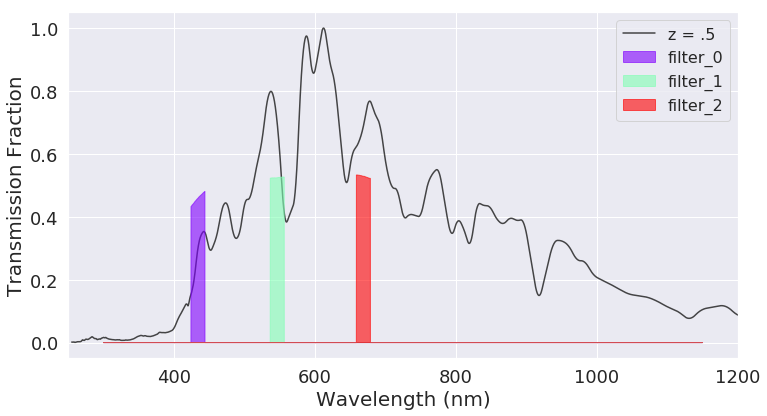

In [55]:
fig = plt.figure(figsize=(12, 14))
fig.add_subplot(2,1,1)
sig_plotmix1.plot_filters(fig=fig)
ax = plt.gca()
ax.lines[0].set_alpha(0.8)
plt.xlabel('Wavelength (nm)', size=20)
plt.ylabel('Transmission Fraction', size=20)
plt.legend((['z = .5'] + sig_plotmix1.filter_dict.keys()), 
           loc=0, fontsize=16)
plt.xticks(size=18)
plt.yticks(size=18)
#plt.savefig('Example_2.pdf')



In [56]:
#exp time = 15, 20nm, real prior
sig_plotmix1.filter_dict.keys()

['filter_0', 'filter_1', 'filter_2']

In [57]:
f0 = sig_plotmix1.filter_dict['filter_0']
f0.writeThroughput('Filter_Saves/total_mix1a.dat')

In [58]:
f1 = sig_plotmix1.filter_dict['filter_1']
f1.writeThroughput('Filter_Saves/total_mix1b.dat')

In [59]:
f2 = sig_plotmix1.filter_dict['filter_2']
f2.writeThroughput('Filter_Saves/total_mix1c.dat')

In [60]:
saved_frozen_dict1 = BandpassDict.loadTotalBandpassesFromFiles(bandpassDir='Filter_Saves', bandpassNames = ['mix1a','mix1b','mix1c'], bandpassRoot = 'total_')

In [61]:
saved_frozen_dict1.keys()

['mix1a', 'mix1b', 'mix1c']

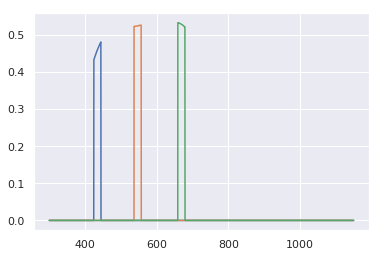

In [62]:
plt.plot(saved_frozen_dict1['mix1a'].wavelen,saved_frozen_dict1['mix1a'].sb)
plt.plot(saved_frozen_dict1['mix1b'].wavelen,saved_frozen_dict1['mix1b'].sb)
plt.plot(saved_frozen_dict1['mix1c'].wavelen,saved_frozen_dict1['mix1c'].sb)

In [63]:
#no frozen, 3 filters, real prior, 20nm
sig_example = siggi([salt2_spec,sna7pg_specnew], [1.0], real_prior_low_z, calib_filter=bp_dict['r'],
                    z_min=0.00, z_max=.76, z_steps=21, phot_params=new_phot_params, calib_mag=23.7)

In [64]:
test_rand_state = np.random.RandomState(2325)    
num_filters = 3
set_ratio = 1
res_mix1b = sig_example.optimize_filters(num_filters=num_filters,
                                     filt_min=300., filt_max=1100.,
                                     set_ratio=set_ratio,
                                     system_wavelen_max=1200.,
                                     n_opt_points=50,
                                     optimizer_verbosity=5,
                                     procs=1, acq_func_kwargs_dict={'kappa':1.8},
                                     frozen_filt_dict=saved_frozen_dict1, 
                                     frozen_filt_eff_wavelen=[best_ptmix1[0]+10,best_ptmix1[1]+10,best_ptmix1[2]+10],
                                     #starting_points = [[mid-50., mid+50., mid_2-50., mid_2+50.] for mid, mid_2 in point_list],
                                     starting_points = None,
                                     rand_state = test_rand_state,
                                     set_width = 20)


[[300.0, 690.0, 1080.0], [566.6666666666667, 823.3333333333334, 1080.0], [833.3333333333334, 956.6666666666667, 1080.0], [376.86514058556975, 501.91118594174134, 541.8013970009033], [418.40966345926034, 554.881055009717, 1018.3848730498541], [317.3853499502618, 472.1803977483952, 623.7248782788874], [476.5379008142483, 546.4069561954537, 664.12296761259], [534.2570740349437, 591.8741853766697, 749.6026837305512], [571.6284587949724, 988.0922628225737, 1047.035466964916], [333.71939669208973, 585.2142296109222, 811.267751567073]]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   18.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   24.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.0min finished


-0.7663143297256454 10
[407.9999999999018, 359.5999999999458, 309.9999999999909] [[397.9053068072411, 397.9053068072411, 417.9053068072411, 417.9053068072411], [349.5266450066574, 349.5266450066574, 369.5266450066574, 369.5266450066574], [300.0, 300.0, 320.0, 320.0]]
1
[309.9999999999909, 309.9999999999909, 967.8999999993925] [[300.0, 300.0, 320.0, 320.0], [300.0, 300.0, 320.0, 320.0], [957.8408026958457, 957.8408026958457, 977.8408026958457, 977.8408026958457]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.4s finished


-0.7663143297256454 11
[1046.7999999993208, 1109.9999999992633, 515.5999999998039] [[1036.7927626352505, 1036.7927626352505, 1056.7927626352505, 1056.7927626352505], [1100.0, 1100.0, 1120.0, 1120.0], [505.524626512577, 505.524626512577, 525.524626512577, 525.524626512577]]
1
2
[392.8999999999155, 552.89999999977, 585.7999999997401] [[382.8273674938047, 382.8273674938047, 402.8273674938047, 402.8273674938047], [542.8458602082555, 542.8458602082555, 562.8458602082555, 562.8458602082555], [575.7656127059307, 575.7656127059307, 595.7656127059307, 595.7656127059307]]
3
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s finished


-0.7663143297256454 12
[604.2999999997232, 994.4999999993684, 563.2999999997605] [[594.2414532989942, 594.2414532989942, 614.2414532989942, 614.2414532989942], [984.428702412508, 984.428702412508, 1004.428702412508, 1004.428702412508], [553.2215175968963, 553.2215175968963, 573.2215175968963, 573.2215175968963]]
1
[309.9999999999909, 608.2999999997196, 999.299999999364] [[300.0, 300.0, 320.0, 320.0], [598.2832026924302, 598.2832026924302, 618.2832026924302, 618.2832026924302], [989.2434216196557, 989.2434216196557, 1009.2434216196557, 1009.2434216196557]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s finished


-0.7663143297256454 13
[432.99999999987904, 474.99999999984084, 555.5999999997675] [[422.9122066854538, 422.9122066854538, 442.9122066854538, 442.9122066854538], [464.9738150783787, 464.9738150783787, 484.9738150783787, 484.9738150783787], [545.509322236401, 545.509322236401, 565.509322236401, 565.509322236401]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.5s finished


-0.7946063187889925 14
[493.2999999998242, 447.39999999986594, 570.7999999997537] [[483.2981417362535, 483.2981417362535, 503.2981417362535, 503.2981417362535], [437.3224728133164, 437.3224728133164, 457.3224728133164, 457.3224728133164], [560.7900924463879, 560.7900924463879, 580.7900924463879, 580.7900924463879]]
1
[421.2999999998897, 376.3999999999305, 593.3999999997332] [[411.2670183766147, 411.2670183766147, 431.2670183766147, 431.2670183766147], [366.36213905358824, 366.36213905358824, 386.36213905358824, 386.36213905358824], [583.3697657987144, 583.3697657987144, 603.3697657987144, 603.3697657987144]]
2
[309.9999999999909, 528.4999999997922, 309.9999999999909] [[300.0, 300.0, 320.0, 320.0], [518.414570354395, 518.414570354395, 538.414570354395, 538.414570354395], [300.0, 300.0, 320.0, 320.0]]
3
[448.49999999986494, 793.5999999995511, 1038.799999999328] [[438.42697915968625, 438.42697915968625, 458.42697915968625, 458.42697915968625], [783.5609639042816, 783.5609639042816, 803.56

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s finished


-0.7946063187889925 15
[395.8999999999128, 518.1999999998015, 554.1999999997688] [[385.8322088820609, 385.8322088820609, 405.8322088820609, 405.8322088820609], [508.1797447201506, 508.17974472015067, 528.1797447201507, 528.1797447201507], [544.1824550705192, 544.1824550705192, 564.1824550705192, 564.1824550705192]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.2s finished


-0.7946063187889925 16
[450.99999999986267, 418.2999999998924, 663.4999999996694] [[440.9160958614859, 440.9160958614859, 460.9160958614859, 460.9160958614859], [408.2367679782674, 408.2367679782674, 428.2367679782674, 428.2367679782674], [653.4835781241987, 653.4835781241987, 673.4835781241987, 673.4835781241987]]
1
[356.3999999999487, 824.9999999995225, 583.1999999997424] [[346.38015198796745, 346.38015198796745, 366.38015198796745, 366.38015198796745], [814.9866511757593, 814.9866511757593, 834.9866511757593, 834.9866511757593], [573.1937383003974, 573.1937383003974, 593.1937383003974, 593.1937383003974]]
2
[309.9999999999909, 526.0999999997944, 797.9999999995471] [[300.0, 300.0, 320.0, 320.0], [516.0454634920883, 516.0454634920883, 536.0454634920883, 536.0454634920883], [787.9926382119004, 787.9926382119004, 807.9926382119004, 807.9926382119004]]
3
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s finished


-0.7946063187889925 17
[565.4999999997585, 484.699999999832, 520.0999999997998] [[555.4278718924637, 555.4278718924637, 575.4278718924637, 575.4278718924637], [474.60504006494324, 474.60504006494324, 494.60504006494324, 494.60504006494324], [510.03009512996493, 510.03009512996493, 530.0300951299649, 530.0300951299649]]
1
[408.4999999999013, 495.4999999998222, 660.8999999996718] [[398.46081594735995, 398.46081594735995, 418.46081594735995, 418.46081594735995], [485.4817961016064, 485.4817961016064, 505.4817961016064, 505.4817961016064], [650.8018405864384, 650.8018405864384, 670.8018405864384, 670.8018405864384]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.2s finished


-0.7946063187889925 18
[426.1999999998852, 481.0999999998353, 551.4999999997713] [[416.18988739460667, 416.18988739460667, 436.18988739460667, 436.18988739460667], [471.0987904820289, 471.0987904820289, 491.0987904820289, 491.0987904820289], [541.4904430611646, 541.4904430611646, 561.4904430611646, 561.4904430611646]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.2s finished


-0.7946063187889925 19
[418.2999999998924, 492.69999999982474, 550.0999999997725] [[408.2009323486745, 408.2009323486745, 428.2009323486745, 428.2009323486745], [482.6704205932991, 482.6704205932991, 502.6704205932991, 502.6704205932991], [540.0715701533479, 540.0715701533479, 560.0715701533479, 560.0715701533479]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s finished


-0.7946063187889925 20
[434.5999999998776, 485.4999999998313, 522.5999999997975] [[424.53840038071814, 424.53840038071814, 444.53840038071814, 444.53840038071814], [475.4139911427499, 475.4139911427499, 495.4139911427499, 495.4139911427499], [512.5551660751223, 512.5551660751223, 532.5551660751223, 532.5551660751223]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s finished


-0.8155514966385389 21
[440.79999999987194, 496.6999999998211, 522.9999999997972] [[430.7208529970835, 430.7208529970835, 450.7208529970835, 450.7208529970835], [486.6111611357833, 486.6111611357833, 506.6111611357833, 506.6111611357833], [512.9212097027815, 512.9212097027815, 532.9212097027815, 532.9212097027815]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s finished


-0.8155514966385389 22
[437.59999999987485, 487.7999999998292, 466.5999999998485] [[427.59840130451005, 427.59840130451005, 447.59840130451005, 447.59840130451005], [477.7544486490156, 477.7544486490156, 497.7544486490156, 497.7544486490156], [456.5459783651527, 456.5459783651527, 476.5459783651527, 476.5459783651527]]
1
[402.19999999990705, 563.2999999997605, 671.0999999996625] [[392.1618622577883, 392.1618622577883, 412.1618622577883, 412.1618622577883], [553.2490708515303, 553.2490708515303, 573.2490708515303, 573.2490708515303], [661.0153920625457, 661.0153920625457, 681.0153920625457, 681.0153920625457]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s finished


-0.8155514966385389 23
[436.59999999987576, 490.49999999982674, 529.5999999997912] [[426.5952310406226, 426.5952310406226, 446.5952310406226, 446.5952310406226], [480.402052406739, 480.402052406739, 500.402052406739, 500.402052406739], [519.540214089378, 519.540214089378, 539.540214089378, 539.540214089378]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.2s finished


-0.8155514966385389 24
[420.6999999998902, 496.99999999982083, 569.4999999997549] [[410.61282048476727, 410.61282048476727, 430.61282048476727, 430.61282048476727], [486.9813265769353, 486.9813265769353, 506.9813265769353, 506.9813265769353], [559.4729717494083, 559.4729717494083, 579.4729717494083, 579.4729717494083]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s finished


-0.8155514966385389 25
[391.19999999991705, 522.4999999997976, 648.499999999683] [[381.11506639431855, 381.11506639431855, 401.11506639431855, 401.11506639431855], [512.4740640922532, 512.4740640922532, 532.4740640922532, 532.4740640922532], [638.4291411115069, 638.4291411115069, 658.4291411115069, 658.4291411115069]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s finished


-0.8155514966385389 26
[434.5999999998776, 678.8999999996554, 1019.3999999993457] [[424.538872698392, 424.538872698392, 444.538872698392, 444.538872698392], [668.8887058662319, 668.8887058662319, 688.8887058662319, 688.8887058662319], [1009.3258354063568, 1009.3258354063568, 1029.3258354063569, 1029.3258354063569]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.8s finished


-0.8155514966385389 27
[429.3999999998823, 501.199999999817, 522.7999999997974] [[419.3064929009338, 419.3064929009338, 439.3064929009338, 439.3064929009338], [491.1772255856468, 491.1772255856468, 511.1772255856468, 511.1772255856468], [512.7884063797069, 512.7884063797069, 532.7884063797069, 532.7884063797069]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s finished


-0.8155514966385389 28
[441.4999999998713, 479.7999999998365, 526.8999999997936] [[431.47898838779554, 431.47898838779554, 451.47898838779554, 451.47898838779554], [469.79480088519267, 469.79480088519267, 489.79480088519267, 489.79480088519267], [516.8539264499735, 516.8539264499735, 536.8539264499735, 536.8539264499735]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s finished


-0.8155514966385389 29
[379.3999999999278, 509.49999999980946, 677.6999999996565] [[369.31881320936395, 369.31881320936395, 389.31881320936395, 389.31881320936395], [499.4507360827876, 499.4507360827876, 519.4507360827877, 519.4507360827877], [667.6710524691832, 667.6710524691832, 687.6710524691832, 687.6710524691832]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.2s finished


-0.8155514966385389 30
1
[415.49999999989495, 601.5999999997257, 993.0999999993696] [[405.4949628215178, 405.4949628215178, 425.4949628215178, 425.4949628215178], [591.5814160202192, 591.5814160202192, 611.5814160202192, 611.5814160202192], [983.0398753301178, 983.0398753301178, 1003.0398753301178, 1003.0398753301178]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s finished


-0.8155514966385389 31
[420.4999999998904, 761.8999999995799, 998.2999999993649] [[410.4401560630956, 410.4401560630956, 430.4401560630956, 430.4401560630956], [751.8447030995421, 751.8447030995421, 771.8447030995421, 771.8447030995421], [988.2116233573154, 988.2116233573154, 1008.2116233573154, 1008.2116233573154]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s finished


-0.8155514966385389 32
[385.59999999992215, 504.0999999998144, 577.8999999997473] [[375.5175524477948, 375.5175524477948, 395.5175524477948, 395.5175524477948], [494.0320645636202, 494.0320645636202, 514.0320645636202, 514.0320645636202], [567.8608718528499, 567.8608718528499, 587.8608718528499, 587.8608718528499]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s finished


-0.8155514966385389 33
[426.29999999988513, 541.6999999997802, 648.9999999996826] [[416.20918736705414, 416.20918736705414, 436.20918736705414, 436.20918736705414], [531.621005760846, 531.621005760846, 551.621005760846, 551.621005760846], [638.9312074105994, 638.9312074105994, 658.9312074105994, 658.9312074105994]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s finished


-0.8155514966385389 34
[471.1999999998443, 598.7999999997282, 707.5999999996293] [[461.1323743378773, 461.1323743378773, 481.1323743378773, 481.1323743378773], [588.7621479290599, 588.7621479290599, 608.7621479290599, 608.7621479290599], [697.5514417524722, 697.5514417524722, 717.5514417524722, 717.5514417524722]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s finished


-0.8155514966385389 35
[480.49999999983584, 879.0999999994733, 1031.5999999993346] [[470.4995926867864, 470.4995926867864, 490.4995926867864, 490.4995926867864], [869.0052250924269, 869.0052250924269, 889.0052250924269, 889.0052250924269], [1021.5814668791927, 1021.5814668791927, 1041.5814668791927, 1041.5814668791927]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.3s finished


-0.8155514966385389 36
[414.49999999989586, 491.59999999982574, 1006.0999999993578] [[404.4738788159823, 404.4738788159823, 424.4738788159823, 424.4738788159823], [481.5826418781309, 481.5826418781309, 501.5826418781309, 501.5826418781309], [996.0791170751595, 996.0791170751595, 1016.0791170751595, 1016.0791170751595]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s finished


-0.8155514966385389 37
[502.9999999998154, 635.8999999996945, 689.3999999996458] [[492.9209876979598, 492.9209876979598, 512.9209876979598, 512.9209876979598], [625.8841159043823, 625.8841159043823, 645.8841159043823, 645.8841159043823], [679.3314760879335, 679.3314760879335, 699.3314760879335, 699.3314760879335]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.2s finished


-0.8155514966385389 38
[477.19999999983884, 532.7999999997883, 980.0999999993815] [[467.1221649337968, 467.1221649337968, 487.1221649337968, 487.1221649337968], [522.7369135767266, 522.7369135767266, 542.7369135767266, 542.7369135767266], [970.0754588402257, 970.0754588402257, 990.0754588402257, 990.0754588402257]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s finished


-0.8155514966385389 39
[441.3999999998714, 488.29999999982874, 532.9999999997881] [[431.39125690945957, 431.39125690945957, 451.39125690945957, 451.39125690945957], [478.29363350865987, 478.29363350865987, 498.29363350865987, 498.29363350865987], [522.9161928053784, 522.9161928053784, 542.9161928053784, 542.9161928053784]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.4s finished


-0.8155514966385389 40
[448.0999999998653, 627.0999999997025, 768.399999999574] [[438.0677518637349, 438.0677518637349, 458.0677518637349, 458.0677518637349], [617.0572622532409, 617.0572622532409, 637.0572622532409, 637.0572622532409], [758.3629555499233, 758.3629555499233, 778.3629555499233, 778.3629555499233]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s finished


-0.8155514966385389 41
[461.1999999998534, 577.4999999997476, 823.1999999995242] [[451.1291082816061, 451.1291082816061, 471.1291082816061, 471.1291082816061], [567.422252367904, 567.422252367904, 587.422252367904, 587.422252367904], [813.116533651737, 813.116533651737, 833.116533651737, 833.116533651737]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s finished


-0.8155514966385389 42
[469.39999999984593, 667.9999999996653, 825.4999999995221] [[459.39901386329836, 459.39901386329836, 479.39901386329836, 479.39901386329836], [657.9816196172848, 657.9816196172848, 677.9816196172848, 677.9816196172848], [815.4097868814001, 815.4097868814001, 835.4097868814001, 835.4097868814001]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s finished


-0.8155514966385389 43
[480.8999999998355, 534.8999999997864, 880.6999999994719] [[470.86371567833646, 470.86371567833646, 490.86371567833646, 490.86371567833646], [524.8342434859376, 524.8342434859376, 544.8342434859376, 544.8342434859376], [870.6810933447199, 870.6810933447199, 890.6810933447199, 890.6810933447199]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s finished


-0.8155514966385389 44
[422.4999999998886, 486.39999999983047, 841.1999999995078] [[412.41114147592293, 412.41114147592293, 432.41114147592293, 432.41114147592293], [476.3864643841613, 476.3864643841613, 496.3864643841613, 496.3864643841613], [831.1381619763282, 831.1381619763282, 851.1381619763282, 851.1381619763282]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s finished


-0.8155514966385389 45
[440.5999999998721, 536.6999999997847, 782.2999999995614] [[430.5644129292696, 430.5644129292696, 450.5644129292696, 450.5644129292696], [526.6813157140718, 526.6813157140718, 546.6813157140718, 546.6813157140718], [772.2865776154163, 772.2865776154163, 792.2865776154163, 792.2865776154163]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s finished


-0.8155514966385389 46
[489.8999999998273, 482.79999999983374, 821.8999999995253] [[479.87350756695196, 479.87350756695196, 499.87350756695196, 499.87350756695196], [472.73854249607825, 472.73854249607825, 492.73854249607825, 492.73854249607825], [811.8156282490535, 811.8156282490535, 831.8156282490535, 831.8156282490535]]
1
[417.69999999989295, 560.4999999997631, 833.299999999515] [[407.61909168210207, 407.61909168210207, 427.61909168210207, 427.61909168210207], [550.4260663982695, 550.4260663982695, 570.4260663982695, 570.4260663982695], [823.2674940133436, 823.2674940133436, 843.2674940133436, 843.2674940133436]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s finished


-0.8155514966385389 47
[452.6999999998611, 558.8999999997645, 898.2999999994558] [[442.6379951607272, 442.6379951607272, 462.6379951607272, 462.6379951607272], [548.8791823209573, 548.8791823209573, 568.8791823209573, 568.8791823209573], [888.2913076042316, 888.2913076042316, 908.2913076042316, 908.2913076042316]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s finished


-0.8155514966385389 48
[424.5999999998867, 560.3999999997632, 777.0999999995661] [[414.56605941671626, 414.56605941671626, 434.56605941671626, 434.56605941671626], [550.3953397741993, 550.3953397741993, 570.3953397741993, 570.3953397741993], [767.0583992860633, 767.0583992860633, 787.0583992860633, 787.0583992860633]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s finished


-0.8155514966385389 49
[390.4999999999177, 487.09999999982983, 861.6999999994891] [[380.4756156053422, 380.4756156053422, 400.4756156053422, 400.4756156053422], [477.0764767926221, 477.0764767926221, 497.0764767926221, 497.0764767926221], [851.698992783199, 851.698992783199, 871.698992783199, 871.698992783199]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s finished


-0.8155514966385389 50


In [65]:
min_idxmix1b = np.argmin(res_mix1b.yi[:-3])
best_ptmix1b = res_mix1b.Xi[min_idxmix1b]
print(best_ptmix1b, res_mix1b.yi[min_idxmix1b])

[424.53840038071814, 475.4139911427499, 512.5551660751223] -0.8155514966385389


In [66]:
sig_plotmix1b = plotting([cpsalt2_spec_50], best_ptmix1b, 'trap',
                    frozen_filt_dict=saved_frozen_dict1, 
                    frozen_filt_eff_wavelen=[best_ptmix1[0]+10,best_ptmix1[1]+10,best_ptmix1[2]+10],
                    set_ratio = 1, sed_mags=23.7, set_width = 20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

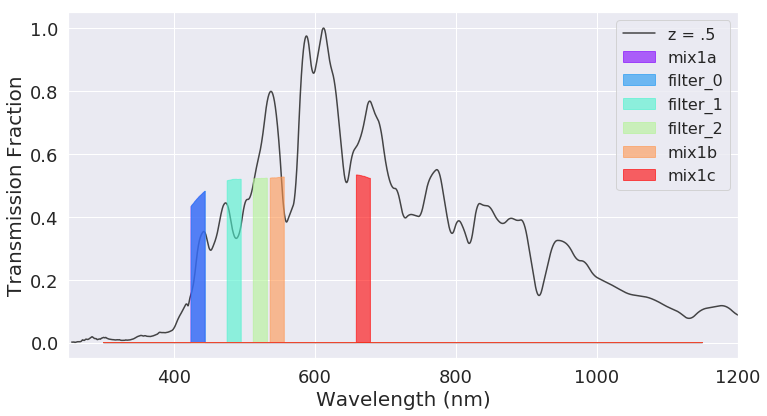

In [67]:
fig = plt.figure(figsize=(12, 14))
fig.add_subplot(2,1,1)
sig_plotmix1b.plot_filters(fig=fig)
ax = plt.gca()
ax.lines[0].set_alpha(0.8)
plt.xlabel('Wavelength (nm)', size=20)
plt.ylabel('Transmission Fraction', size=20)
plt.legend((['z = .5'] + sig_plotmix1b.filter_dict.keys()), 
           loc=0, fontsize=16)
plt.xticks(size=18)
plt.yticks(size=18)
#plt.savefig('Example_2.pdf')



In [68]:
#exp time = 15, 20nm, real prior
sig_plotmix1b.filter_dict.keys()

['mix1a', 'filter_0', 'filter_1', 'filter_2', 'mix1b', 'mix1c']

In [69]:
f0 = sig_plotmix1b.filter_dict['filter_0']
f0.writeThroughput('Filter_Saves/total_mix1d.dat')

In [70]:
f1 = sig_plotmix1b.filter_dict['filter_1']
f1.writeThroughput('Filter_Saves/total_mix1e.dat')

In [71]:
f2 = sig_plotmix1b.filter_dict['filter_2']
f2.writeThroughput('Filter_Saves/total_mix1f.dat')

In [72]:
saved_frozen_dict1b = BandpassDict.loadTotalBandpassesFromFiles(bandpassDir='Filter_Saves', bandpassNames = ['mix1a','mix1b','mix1c','mix1d','mix1e','mix1f'], bandpassRoot = 'total_')

In [73]:
saved_frozen_dict1b.keys()

['mix1a', 'mix1b', 'mix1c', 'mix1d', 'mix1e', 'mix1f']

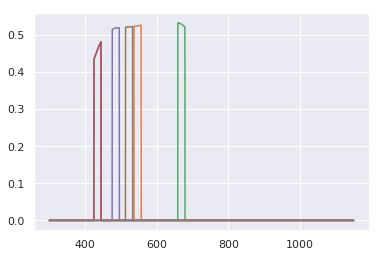

In [74]:
plt.plot(saved_frozen_dict1b['mix1a'].wavelen,saved_frozen_dict1b['mix1a'].sb)
plt.plot(saved_frozen_dict1b['mix1b'].wavelen,saved_frozen_dict1b['mix1b'].sb)
plt.plot(saved_frozen_dict1b['mix1c'].wavelen,saved_frozen_dict1b['mix1c'].sb)
plt.plot(saved_frozen_dict1b['mix1d'].wavelen,saved_frozen_dict1b['mix1d'].sb)
plt.plot(saved_frozen_dict1b['mix1e'].wavelen,saved_frozen_dict1b['mix1e'].sb)
plt.plot(saved_frozen_dict1b['mix1f'].wavelen,saved_frozen_dict1b['mix1f'].sb)

In [75]:
#no frozen, 3 filters, real prior, 20nm
sig_example = siggi([salt2_spec,sna7pg_specnew], [1.0], real_prior_low_z, calib_filter=bp_dict['r'],
                    z_min=0.00, z_max=.76, z_steps=21, phot_params=new_phot_params, calib_mag=23.7)

In [76]:
test_rand_state = np.random.RandomState(2325)    
num_filters = 3
set_ratio = 1
res_mix1c = sig_example.optimize_filters(num_filters=num_filters,
                                     filt_min=300., filt_max=1100.,
                                     set_ratio=set_ratio,
                                     system_wavelen_max=1200.,
                                     n_opt_points=50,
                                     optimizer_verbosity=5,
                                     procs=1, acq_func_kwargs_dict={'kappa':1.8},
                                     frozen_filt_dict=saved_frozen_dict1b, 
                                     frozen_filt_eff_wavelen=[best_ptmix1[0]+10,best_ptmix1[1]+10,best_ptmix1[2]+10,
                                     best_ptmix1b[0]+10,best_ptmix1b[1]+10,best_ptmix1b[2]+10],
                                     #starting_points = [[mid-50., mid+50., mid_2-50., mid_2+50.] for mid, mid_2 in point_list],
                                     starting_points = None,
                                     rand_state = test_rand_state,
                                     set_width = 20)


[[300.0, 690.0, 1080.0], [566.6666666666667, 823.3333333333334, 1080.0], [833.3333333333334, 956.6666666666667, 1080.0], [376.86514058556975, 501.91118594174134, 541.8013970009033], [418.40966345926034, 554.881055009717, 1018.3848730498541], [317.3853499502618, 472.1803977483952, 623.7248782788874], [476.5379008142483, 546.4069561954537, 664.12296761259], [534.2570740349437, 591.8741853766697, 749.6026837305512], [571.6284587949724, 988.0922628225737, 1047.035466964916], [333.71939669208973, 585.2142296109222, 811.267751567073]]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   26.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   34.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.5min finished


-0.9621946091351048 10
[411.4999999998986, 309.9999999999909, 309.9999999999909] [[401.40727871152546, 401.40727871152546, 421.40727871152546, 421.40727871152546], [300.0, 300.0, 320.0, 320.0], [300.0, 300.0, 320.0, 320.0]]
1
[309.9999999999909, 309.9999999999909, 977.0999999993842] [[300.0, 300.0, 320.0, 320.0], [300.0, 300.0, 320.0, 320.0], [967.0622917601688, 967.0622917601688, 987.0622917601688, 987.0622917601688]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s finished


-0.9621946091351048 11
[1032.6999999993336, 1109.9999999992633, 593.1999999997333] [[1022.6136787900315, 1022.6136787900314, 1042.6136787900314, 1042.6136787900314], [1100.0, 1100.0, 1120.0, 1120.0], [583.1840601854447, 583.1840601854447, 603.1840601854447, 603.1840601854447]]
1
[341.0999999999626, 333.59999999996944, 1040.8999999993262] [[331.0846420577311, 331.0846420577311, 351.0846420577311, 351.0846420577311], [323.54420367144166, 323.54420367144166, 343.54420367144166, 343.54420367144166], [1030.8482573517963, 1030.8482573517963, 1050.8482573517963, 1050.8482573517963]]
2
[994.6999999993682, 541.0999999997807, 468.49999999984675] [[984.628725783319, 984.628725783319, 1004.628725783319, 1004.628725783319], [531.046172168738, 531.046172168738, 551.046172168738, 551.046172168738], [458.4811273913961, 458.4811273913961, 478.4811273913961, 478.4811273913961]]
3
[363.9999999999418, 1012.5999999993519, 667.4999999996658] [[353.91788238941774, 353.91788238941774, 373.91788238941774, 373.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s finished


-0.9621946091351048 12
[334.099999999969, 508.5999999998103, 560.7999999997628] [[324.0407739751369, 324.0407739751369, 344.0407739751369, 344.0407739751369], [498.5095609867869, 498.5095609867869, 518.5095609867869, 518.5095609867869], [550.7237368874028, 550.7237368874028, 570.7237368874028, 570.7237368874028]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s finished


-0.9621946091351048 13
[332.1999999999707, 391.8999999999164, 931.5999999994256] [[322.1854736893712, 322.1854736893712, 342.1854736893712, 342.1854736893712], [381.85696204871067, 381.85696204871067, 401.85696204871067, 401.85696204871067], [921.566631394567, 921.566631394567, 941.566631394567, 941.566631394567]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s finished


-0.9621946091351048 14
[473.09999999984257, 628.699999999701, 1020.199999999345] [[463.06449100654146, 463.06449100654146, 483.06449100654146, 483.06449100654146], [618.6721369080212, 618.6721369080212, 638.6721369080212, 638.6721369080212], [1010.1428194491881, 1010.1428194491881, 1030.1428194491882, 1030.1428194491882]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s finished


-0.9621946091351048 15
[472.599999999843, 367.4999999999386, 709.9999999996271] [[462.5698292679574, 462.5698292679574, 482.5698292679574, 482.5698292679574], [357.4469818545048, 357.4469818545048, 377.4469818545048, 377.4469818545048], [699.9245357132986, 699.9245357132986, 719.9245357132986, 719.9245357132986]]
1
[471.0999999998444, 321.39999999998054, 676.0999999996579] [[461.099923543213, 461.099923543213, 481.099923543213, 481.099923543213], [311.3736576671535, 311.3736576671535, 331.3736576671535, 331.3736576671535], [666.0024465127068, 666.0024465127068, 686.0024465127068, 686.0024465127068]]
2
[384.29999999992333, 580.5999999997448, 309.9999999999909] [[374.2016129896877, 374.2016129896877, 394.2016129896877, 394.2016129896877], [570.5120782543654, 570.5120782543654, 590.5120782543654, 590.5120782543654], [300.0, 300.0, 320.0, 320.0]]
3
[420.79999999989013, 555.4999999997676, 641.6999999996892] [[410.71778769298726, 410.71778769298726, 430.71778769298726, 430.71778769298726], [

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s finished


-1.0005489586987597 16
[370.7999999999356, 556.2999999997669, 620.999999999708] [[360.7263157154835, 360.7263157154835, 380.7263157154835, 380.7263157154835], [546.2914075938381, 546.2914075938381, 566.2914075938381, 566.2914075938381], [610.9042144457179, 610.9042144457179, 630.9042144457179, 630.9042144457179]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s finished


-1.0005489586987597 17
[546.1999999997761, 557.6999999997656, 636.1999999996942] [[536.1712653174109, 536.1712653174109, 556.1712653174109, 556.1712653174109], [547.6880293598279, 547.6880293598279, 567.6880293598279, 567.6880293598279], [626.1900113080824, 626.1900113080824, 646.1900113080824, 646.1900113080824]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s finished


-1.0005489586987597 18
[336.99999999996635, 556.0999999997671, 643.4999999996876] [[326.90557282229344, 326.90557282229344, 346.90557282229344, 346.90557282229344], [546.0281210076646, 546.0281210076646, 566.0281210076646, 566.0281210076646], [633.484052788883, 633.484052788883, 653.484052788883, 653.484052788883]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s finished


-1.0005489586987597 19
[417.59999999989304, 559.499999999764, 976.4999999993847] [[407.5911358785097, 407.5911358785097, 427.5911358785097, 427.5911358785097], [549.4392121286967, 549.4392121286967, 569.4392121286967, 569.4392121286967], [966.4907444738373, 966.4907444738373, 986.4907444738373, 986.4907444738373]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s finished


-1.0005489586987597 20
[1109.9999999992633, 513.299999999806, 590.1999999997361] [[1100.0, 1100.0, 1120.0, 1120.0], [503.22185226149634, 503.22185226149634, 523.2218522614963, 523.2218522614963], [580.1729242716094, 580.1729242716094, 600.1729242716094, 600.1729242716094]]
1
[437.39999999987504, 537.0999999997844, 624.5999999997048] [[427.37395702028147, 427.37395702028147, 447.37395702028147, 447.37395702028147], [527.0119592801113, 527.0119592801113, 547.0119592801113, 547.0119592801113], [614.5658872114709, 614.5658872114709, 634.5658872114709, 634.5658872114709]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s finished


-1.0005489586987597 21
[449.2999999998642, 578.6999999997465, 642.1999999996888] [[439.2481930923386, 439.2481930923386, 459.2481930923386, 459.2481930923386], [568.6824269190342, 568.6824269190342, 588.6824269190342, 588.6824269190342], [632.1045290432307, 632.1045290432307, 652.1045290432307, 652.1045290432307]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s finished


-1.0542326855217468 22
[456.29999999985785, 596.89999999973, 643.6999999996874] [[446.2283904218091, 446.2283904218091, 466.2283904218091, 466.2283904218091], [586.8729006534105, 586.8729006534105, 606.8729006534105, 606.8729006534105], [633.6108882874744, 633.6108882874744, 653.6108882874744, 653.6108882874744]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s finished


-1.0716196445778627 23
[457.6999999998566, 619.4999999997094, 658.7999999996737] [[447.69343982014135, 447.69343982014135, 467.69343982014135, 467.69343982014135], [609.4380895306333, 609.4380895306333, 629.4380895306333, 629.4380895306333], [648.77956029272, 648.77956029272, 668.77956029272, 668.77956029272]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s finished


-1.0716196445778627 24
[468.39999999984684, 606.3999999997213, 630.3999999996995] [[458.3040243980867, 458.3040243980867, 478.3040243980867, 478.3040243980867], [596.3533232510213, 596.3533232510213, 616.3533232510213, 616.3533232510213], [620.3610750556506, 620.3610750556506, 640.3610750556506, 640.3610750556506]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s finished


-1.0716196445778627 25
[910.5999999994447, 665.1999999996679, 887.9999999994652] [[900.5258211686792, 900.5258211686792, 920.5258211686792, 920.5258211686792], [655.1494347970719, 655.1494347970719, 675.1494347970719, 675.1494347970719], [877.9375996533428, 877.9375996533428, 897.9375996533428, 897.9375996533428]]
1
[309.9999999999909, 576.9999999997481, 981.9999999993797] [[300.0, 300.0, 320.0, 320.0], [566.9268856054098, 566.9268856054098, 586.9268856054098, 586.9268856054098], [971.9752662377948, 971.9752662377948, 991.9752662377948, 991.9752662377948]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s finished


-1.0716196445778627 26
1
[706.5999999996302, 989.0999999993733, 1011.4999999993529] [[696.5918795744903, 696.5918795744903, 716.5918795744903, 716.5918795744903], [979.0402268109968, 979.0402268109968, 999.0402268109968, 999.0402268109968], [1001.4164383297409, 1001.4164383297409, 1021.4164383297409, 1021.4164383297409]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s finished


-1.0716196445778627 27
1
[577.7999999997473, 873.3999999994785, 1031.9999999993342] [[567.7302708323198, 567.7302708323198, 587.7302708323198, 587.7302708323198], [863.3937018226108, 863.3937018226108, 883.3937018226108, 883.3937018226108], [1021.9745874592728, 1021.9745874592727, 1041.9745874592727, 1041.9745874592727]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s finished


-1.0716196445778627 28
[309.9999999999909, 1109.9999999992633, 309.9999999999909] [[300.0, 300.0, 320.0, 320.0], [1100.0, 1100.0, 1120.0, 1120.0], [300.0, 300.0, 320.0, 320.0]]
1
[309.9999999999909, 309.9999999999909, 913.499999999442] [[300.0, 300.0, 320.0, 320.0], [300.0, 300.0, 320.0, 320.0], [903.4234656160991, 903.4234656160991, 923.4234656160991, 923.4234656160991]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s finished


-1.0716196445778627 29
[428.0999999998835, 443.09999999986985, 555.4999999997676] [[418.02433132698695, 418.02433132698695, 438.02433132698695, 438.02433132698695], [433.0902802534131, 433.0902802534131, 453.0902802534131, 453.0902802534131], [545.4166816312079, 545.4166816312079, 565.4166816312079, 565.4166816312079]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.0s finished


-1.0716196445778627 30
[371.8999999999346, 411.5999999998985, 521.5999999997985] [[361.84689233745365, 361.84689233745365, 381.84689233745365, 381.84689233745365], [401.5214483098954, 401.5214483098954, 421.5214483098954, 421.5214483098954], [511.51632595217825, 511.51632595217825, 531.5163259521782, 531.5163259521782]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.9s finished


-1.0716196445778627 31
[805.9999999995398, 1109.9999999992633, 1038.9999999993279] [[795.9252887829919, 795.9252887829919, 815.9252887829919, 815.9252887829919], [1100.0, 1100.0, 1120.0, 1120.0], [1028.973912109358, 1028.973912109358, 1048.973912109358, 1048.973912109358]]
1
[678.7999999996555, 928.899999999428, 1063.1999999993059] [[668.7191069352695, 668.7191069352695, 688.7191069352695, 688.7191069352695], [918.8180370029424, 918.8180370029424, 938.8180370029424, 938.8180370029424], [1053.1073231096354, 1053.1073231096354, 1073.1073231096354, 1073.1073231096354]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s finished


-1.0716196445778627 32
[357.2999999999479, 754.7999999995864, 1004.9999999993588] [[347.2101051130485, 347.2101051130485, 367.2101051130485, 367.2101051130485], [744.7191785894679, 744.7191785894679, 764.7191785894679, 764.7191785894679], [994.9015826886623, 994.9015826886623, 1014.9015826886623, 1014.9015826886623]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s finished


-1.0716196445778627 33
[441.2999999998715, 597.4999999997294, 654.3999999996777] [[431.2601808355328, 431.2601808355328, 451.2601808355328, 451.2601808355328], [587.463479468491, 587.463479468491, 607.463479468491, 607.463479468491], [644.3124659706084, 644.3124659706084, 664.3124659706084, 664.3124659706084]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.0s finished


-1.0716196445778627 34
[563.2999999997605, 968.6999999993918, 973.6999999993873] [[553.2615896124533, 553.2615896124533, 573.2615896124533, 573.2615896124533], [958.6101374121546, 958.6101374121546, 978.6101374121546, 978.6101374121546], [963.6043899403396, 963.6043899403396, 983.6043899403396, 983.6043899403396]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s finished


-1.0716196445778627 35
[432.2999999998797, 670.9999999996626, 753.1999999995878] [[422.2080590890064, 422.2080590890064, 442.2080590890064, 442.2080590890064], [660.9862807329544, 660.9862807329544, 680.9862807329544, 680.9862807329544], [743.1006376300214, 743.1006376300214, 763.1006376300214, 763.1006376300214]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.9s finished


-1.0716196445778627 36
[455.9999999998581, 638.699999999692, 888.4999999994648] [[445.99878305735683, 445.99878305735683, 465.99878305735683, 465.99878305735683], [628.6305486152013, 628.6305486152013, 648.6305486152013, 648.6305486152013], [878.4943501554445, 878.4943501554445, 898.4943501554445, 898.4943501554445]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.1s finished


-1.0716196445778627 37
[476.19999999983975, 553.4999999997694, 894.1999999994596] [[466.18277043281677, 466.18277043281677, 486.18277043281677, 486.18277043281677], [543.4207498070778, 543.4207498070778, 563.4207498070778, 563.4207498070778], [884.1167026765701, 884.1167026765701, 904.1167026765701, 904.1167026765701]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s finished


-1.0716196445778627 38
1
[489.9999999998272, 461.79999999985284, 529.2999999997915] [[479.9722536982672, 479.9722536982672, 499.9722536982672, 499.9722536982672], [451.76253962779515, 451.76253962779515, 471.76253962779515, 471.76253962779515], [519.2856433542486, 519.2856433542486, 539.2856433542486, 539.2856433542486]]
2
[412.09999999989805, 458.59999999985575, 597.0999999997298] [[402.0445292523816, 402.0445292523816, 422.0445292523816, 422.0445292523816], [448.54836513253537, 448.54836513253537, 468.54836513253537, 468.54836513253537], [587.042401247561, 587.042401247561, 607.042401247561, 607.042401247561]]
3
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s finished


-1.0716196445778627 39
[368.3999999999378, 513.5999999998057, 691.6999999996438] [[358.37593454345017, 358.37593454345017, 378.37593454345017, 378.37593454345017], [503.5899266543041, 503.5899266543041, 523.5899266543041, 523.5899266543041], [681.6208705127686, 681.6208705127686, 701.6208705127686, 701.6208705127686]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s finished


-1.0716196445778627 40
[309.9999999999909, 421.4999999998895, 911.6999999994437] [[300.0, 300.0, 320.0, 320.0], [411.40086585633566, 411.40086585633566, 431.40086585633566, 431.40086585633566], [901.6469014047201, 901.6469014047201, 921.6469014047201, 921.6469014047201]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s finished


-1.0716196445778627 41
[568.8999999997554, 630.6999999996992, 653.0999999996789] [[558.861188498377, 558.861188498377, 578.861188498377, 578.861188498377], [620.6208934875674, 620.6208934875674, 640.6208934875674, 640.6208934875674], [643.0463481872723, 643.0463481872723, 663.0463481872723, 663.0463481872723]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s finished


-1.0716196445778627 42
[524.1999999997961, 863.4999999994875, 1088.4999999992829] [[514.1400610792728, 514.1400610792728, 534.1400610792728, 534.1400610792728], [853.4254678418204, 853.4254678418204, 873.4254678418204, 873.4254678418204], [1078.4356276136198, 1078.4356276136198, 1098.4356276136198, 1098.4356276136198]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s finished


-1.0716196445778627 43
[407.2999999999024, 435.9999999998763, 562.4999999997613] [[397.24722401490175, 397.24722401490175, 417.24722401490175, 417.24722401490175], [425.9109580942192, 425.9109580942192, 445.9109580942192, 445.9109580942192], [552.4108377337436, 552.4108377337436, 572.4108377337436, 572.4108377337436]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s finished


-1.0716196445778627 44
[655.7999999996764, 1028.1999999993377, 921.8999999994344] [[645.7478254027947, 645.7478254027947, 665.7478254027947, 665.7478254027947], [1018.1492337323308, 1018.1492337323307, 1038.1492337323307, 1038.1492337323307], [911.8346522172266, 911.8346522172266, 931.8346522172266, 931.8346522172266]]
1
2
[663.2999999996696, 950.7999999994081, 1029.8999999993362] [[653.2693284639947, 653.2693284639947, 673.2693284639947, 673.2693284639947], [940.7123199860664, 940.7123199860664, 960.7123199860664, 960.7123199860664], [1019.8511649052434, 1019.8511649052434, 1039.8511649052434, 1039.8511649052434]]
3
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s finished


-1.0716196445778627 45
[449.49999999986403, 612.8999999997154, 638.3999999996922] [[439.44854776080706, 439.44854776080706, 459.44854776080706, 459.44854776080706], [602.8721000854823, 602.8721000854823, 622.8721000854823, 622.8721000854823], [628.3431386180039, 628.3431386180039, 648.3431386180039, 648.3431386180039]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s finished


-1.0716196445778627 46
1
[441.6999999998711, 587.8999999997382, 766.199999999576] [[431.6506122649756, 431.6506122649756, 451.6506122649756, 451.6506122649756], [577.8467331438103, 577.8467331438103, 597.8467331438103, 597.8467331438103], [756.1229543380945, 756.1229543380945, 776.1229543380945, 776.1229543380945]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.6s finished


-1.0716196445778627 47
[309.9999999999909, 428.79999999988286, 680.9999999996535] [[300.0, 300.0, 320.0, 320.0], [418.7885918917761, 418.7885918917761, 438.7885918917761, 438.7885918917761], [670.9423702502977, 670.9423702502977, 690.9423702502977, 690.9423702502977]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.7s finished


-1.0716196445778627 48
[434.5999999998776, 583.8999999997418, 769.8999999995726] [[424.5399383480999, 424.5399383480999, 444.5399383480999, 444.5399383480999], [573.8797071719735, 573.8797071719735, 593.8797071719735, 593.8797071719735], [759.8091108111021, 759.8091108111021, 779.8091108111021, 779.8091108111021]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.0s finished


-1.0716196445778627 49
[482.1999999998343, 629.9999999996999, 737.6999999996019] [[472.1018740342039, 472.1018740342039, 492.1018740342039, 492.1018740342039], [619.9701095241721, 619.9701095241721, 639.9701095241721, 639.9701095241721], [727.6257334649217, 727.6257334649217, 747.6257334649217, 747.6257334649217]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s finished


-1.0716196445778627 50


In [77]:
min_idxmix1c = np.argmin(res_mix1c.yi[:-3])
best_ptmix1c = res_mix1c.Xi[min_idxmix1c]
print(best_ptmix1c, res_mix1c.yi[min_idxmix1c])

[446.2283904218091, 586.8729006534105, 633.6108882874744] -1.0716196445778627


In [78]:
sig_plotmix1c = plotting([cpsalt2_spec_50], best_ptmix1c, 'trap',
                    frozen_filt_dict=saved_frozen_dict1b, 
                    frozen_filt_eff_wavelen=[best_ptmix1[0]+10,best_ptmix1[1]+10,best_ptmix1[2]+10,
                    best_ptmix1b[0]+10,best_ptmix1b[1]+10,best_ptmix1b[2]+10],
                    set_ratio = 1, sed_mags=23.7, set_width = 20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

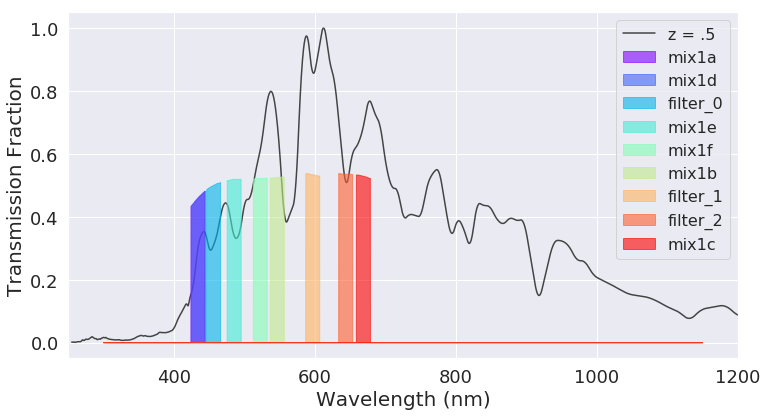

In [79]:
fig = plt.figure(figsize=(12, 14))
fig.add_subplot(2,1,1)
sig_plotmix1c.plot_filters(fig=fig)
ax = plt.gca()
ax.lines[0].set_alpha(0.8)
plt.xlabel('Wavelength (nm)', size=20)
plt.ylabel('Transmission Fraction', size=20)
plt.legend((['z = .5'] + sig_plotmix1c.filter_dict.keys()), 
           loc=0, fontsize=16)
plt.xticks(size=18)
plt.yticks(size=18)
#plt.savefig('Example_2.pdf')



In [80]:
#exp time = 15, 20nm, real prior
sig_plotmix1c.filter_dict.keys()

['mix1a',
 'mix1d',
 'filter_0',
 'mix1e',
 'mix1f',
 'mix1b',
 'filter_1',
 'filter_2',
 'mix1c']

In [81]:
f0 = sig_plotmix1c.filter_dict['filter_0']
f0.writeThroughput('Filter_Saves/total_mix1g.dat')

In [82]:
f1 = sig_plotmix1c.filter_dict['filter_1']
f1.writeThroughput('Filter_Saves/total_mix1h.dat')

In [83]:
f2 = sig_plotmix1c.filter_dict['filter_2']
f2.writeThroughput('Filter_Saves/total_mix1i.dat')

In [84]:
saved_frozen_dict1c = BandpassDict.loadTotalBandpassesFromFiles(bandpassDir='Filter_Saves', bandpassNames = ['mix1a','mix1b','mix1c','mix1d','mix1e','mix1f','mix1g','mix1h','mix1i'], bandpassRoot = 'total_')

In [85]:
saved_frozen_dict1c.keys()

['mix1a',
 'mix1b',
 'mix1c',
 'mix1d',
 'mix1e',
 'mix1f',
 'mix1g',
 'mix1h',
 'mix1i']

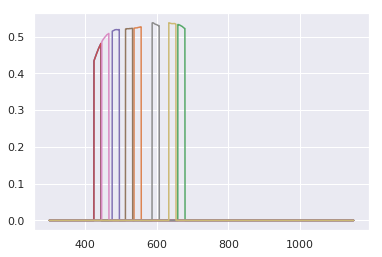

In [86]:
plt.plot(saved_frozen_dict1c['mix1a'].wavelen,saved_frozen_dict1c['mix1a'].sb)
plt.plot(saved_frozen_dict1c['mix1b'].wavelen,saved_frozen_dict1c['mix1b'].sb)
plt.plot(saved_frozen_dict1c['mix1c'].wavelen,saved_frozen_dict1c['mix1c'].sb)
plt.plot(saved_frozen_dict1c['mix1d'].wavelen,saved_frozen_dict1c['mix1d'].sb)
plt.plot(saved_frozen_dict1c['mix1e'].wavelen,saved_frozen_dict1c['mix1e'].sb)
plt.plot(saved_frozen_dict1c['mix1f'].wavelen,saved_frozen_dict1c['mix1f'].sb)
plt.plot(saved_frozen_dict1c['mix1g'].wavelen,saved_frozen_dict1c['mix1g'].sb)
plt.plot(saved_frozen_dict1c['mix1h'].wavelen,saved_frozen_dict1c['mix1h'].sb)
plt.plot(saved_frozen_dict1c['mix1i'].wavelen,saved_frozen_dict1c['mix1i'].sb)

In [87]:
#no frozen, 3 filters, real prior, 20nm
sig_example = siggi([salt2_spec,sna7pg_specnew], [1.0], real_prior_low_z, calib_filter=bp_dict['r'],
                    z_min=0.00, z_max=.76, z_steps=21, phot_params=new_phot_params, calib_mag=23.7)

In [88]:
test_rand_state = np.random.RandomState(2325)    
num_filters = 3
set_ratio = 1
res_mix1d = sig_example.optimize_filters(num_filters=num_filters,
                                     filt_min=300., filt_max=1100.,
                                     set_ratio=set_ratio,
                                     system_wavelen_max=1200.,
                                     n_opt_points=50,
                                     optimizer_verbosity=5,
                                     procs=1, acq_func_kwargs_dict={'kappa':1.8},
                                     frozen_filt_dict=saved_frozen_dict1c, 
                                     frozen_filt_eff_wavelen=[best_ptmix1[0]+10,best_ptmix1[1]+10,best_ptmix1[2]+10,
                                     best_ptmix1b[0]+10,best_ptmix1b[1]+10,best_ptmix1b[2]+10,
                                     best_ptmix1c[0]+10,best_ptmix1c[1]+10,best_ptmix1c[2]+10],
                                     #starting_points = [[mid-50., mid+50., mid_2-50., mid_2+50.] for mid, mid_2 in point_list],
                                     starting_points = None,
                                     rand_state = test_rand_state,
                                     set_width = 20)


[[300.0, 690.0, 1080.0], [566.6666666666667, 823.3333333333334, 1080.0], [833.3333333333334, 956.6666666666667, 1080.0], [376.86514058556975, 501.91118594174134, 541.8013970009033], [418.40966345926034, 554.881055009717, 1018.3848730498541], [317.3853499502618, 472.1803977483952, 623.7248782788874], [476.5379008142483, 546.4069561954537, 664.12296761259], [534.2570740349437, 591.8741853766697, 749.6026837305512], [571.6284587949724, 988.0922628225737, 1047.035466964916], [333.71939669208973, 585.2142296109222, 811.267751567073]]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   23.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   34.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   46.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.9min finished


-1.1262178607092146 10
[1109.9999999992633, 314.3999999999869, 646.299999999685] [[1100.0, 1100.0, 1120.0, 1120.0], [304.30988867755167, 304.30988867755167, 324.30988867755167, 324.30988867755167], [636.2662864266026, 636.2662864266026, 656.2662864266026, 656.2662864266026]]
1
[731.8999999996072, 309.9999999999909, 309.9999999999909] [[721.8275649499892, 721.8275649499892, 741.8275649499892, 741.8275649499892], [300.0, 300.0, 320.0, 320.0], [300.0, 300.0, 320.0, 320.0]]
2
[309.9999999999909, 1109.9999999992633, 309.9999999999909] [[300.0, 300.0, 320.0, 320.0], [1100.0, 1100.0, 1120.0, 1120.0], [300.0, 300.0, 320.0, 320.0]]
3
4
[661.2999999996714, 598.8999999997282, 623.9999999997053] [[651.2143608060339, 651.2143608060339, 671.2143608060339, 671.2143608060339], [588.879338761582, 588.879338761582, 608.879338761582, 608.879338761582], [613.9696324802737, 613.9696324802737, 633.9696324802737, 633.9696324802737]]
5
[426.39999999988504, 585.1999999997406, 1020.8999999993443] [[416.37321440

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s finished


-1.1262178607092146 11
[332.59999999997035, 462.3999999998523, 726.0999999996125] [[322.51871656359185, 322.51871656359185, 342.51871656359185, 342.51871656359185], [452.3835464172911, 452.3835464172911, 472.3835464172911, 472.3835464172911], [716.0623568219792, 716.0623568219792, 736.0623568219792, 736.0623568219792]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.5s finished


-1.1262178607092146 12
[383.49999999992406, 505.89999999981274, 565.2999999997587] [[373.4649052757895, 373.4649052757895, 393.4649052757895, 393.4649052757895], [495.87437775384865, 495.87437775384865, 515.8743777538486, 515.8743777538486], [555.20612892806, 555.20612892806, 575.20612892806, 575.20612892806]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.5s finished


-1.1433894670581148 13
[380.19999999992706, 690.8999999996445, 531.999999999789] [[370.14082210223927, 370.14082210223927, 390.14082210223927, 390.14082210223927], [680.8704008537552, 680.8704008537552, 700.8704008537552, 700.8704008537552], [521.9957736246818, 521.9957736246818, 541.9957736246818, 541.9957736246818]]
1
[384.9999999999227, 503.5999999998148, 560.6999999997629] [[374.9323391298796, 374.9323391298796, 394.9323391298796, 394.9323391298796], [493.550398229986, 493.550398229986, 513.5503982299861, 513.5503982299861], [550.6169655430975, 550.6169655430975, 570.6169655430975, 570.6169655430975]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s finished


-1.1433894670581148 14
[425.39999999988595, 544.9999999997772, 1008.8999999993553] [[415.3138150304044, 415.3138150304044, 435.3138150304044, 435.3138150304044], [534.9492769808742, 534.9492769808742, 554.9492769808742, 554.9492769808742], [998.8032545181702, 998.8032545181702, 1018.8032545181702, 1018.8032545181702]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s finished


-1.1433894670581148 15
[382.19999999992524, 488.29999999982874, 661.4999999996712] [[372.1430682954475, 372.1430682954475, 392.1430682954475, 392.1430682954475], [478.29262341335027, 478.29262341335027, 498.29262341335027, 498.29262341335027], [651.4205024566246, 651.4205024566246, 671.4205024566246, 671.4205024566246]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s finished


-1.1433894670581148 16
[383.7999999999238, 505.4999999998131, 449.79999999986376] [[373.7936316318669, 373.7936316318669, 393.7936316318669, 393.7936316318669], [495.4679252556386, 495.4679252556386, 515.4679252556386, 515.4679252556386], [439.75862380742103, 439.75862380742103, 459.75862380742103, 459.75862380742103]]
1
[383.8999999999237, 491.79999999982556, 569.4999999997549] [[373.85805015264935, 373.85805015264935, 393.85805015264935, 393.85805015264935], [481.789358278117, 481.789358278117, 501.789358278117, 501.789358278117], [559.4785188381653, 559.4785188381653, 579.4785188381653, 579.4785188381653]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s finished


-1.1472883755798096 17
[445.6999999998675, 545.5999999997766, 701.0999999996352] [[435.61629667454815, 435.61629667454815, 455.61629667454815, 455.61629667454815], [535.5304421691147, 535.5304421691147, 555.5304421691147, 555.5304421691147], [691.0742676557254, 691.0742676557254, 711.0742676557254, 711.0742676557254]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s finished


-1.1714945902805058 18
[309.9999999999909, 750.9999999995898, 1056.0999999993123] [[300.0, 300.0, 320.0, 320.0], [740.9159767052909, 740.9159767052909, 760.9159767052909, 760.9159767052909], [1046.0723416215087, 1046.0723416215087, 1066.0723416215087, 1066.0723416215087]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s finished


-1.1714945902805058 19
[356.3999999999487, 548.5999999997739, 1030.199999999336] [[346.30513281034393, 346.30513281034393, 366.30513281034393, 366.30513281034393], [538.565994044392, 538.565994044392, 558.565994044392, 558.565994044392], [1020.1706466128527, 1020.1706466128526, 1040.1706466128526, 1040.1706466128526]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.5s finished


-1.1714945902805058 20
[713.4999999996239, 834.1999999995141, 999.5999999993637] [[703.427152202738, 703.427152202738, 723.427152202738, 723.427152202738], [824.1317938363528, 824.1317938363528, 844.1317938363528, 844.1317938363528], [989.5947259459773, 989.5947259459773, 1009.5947259459773, 1009.5947259459773]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.5s finished


-1.1714945902805058 21
[642.3999999996886, 884.0999999994688, 1064.099999999305] [[632.3857118542796, 632.3857118542796, 652.3857118542796, 652.3857118542796], [874.087318246685, 874.087318246685, 894.087318246685, 894.087318246685], [1054.0513744629632, 1054.0513744629632, 1074.0513744629632, 1074.0513744629632]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s finished


-1.1714945902805058 22
[423.09999999988804, 555.3999999997677, 732.6999999996065] [[413.0244086734177, 413.0244086734177, 433.0244086734177, 433.0244086734177], [545.3725227996182, 545.3725227996182, 565.3725227996182, 565.3725227996182], [722.6846394025494, 722.6846394025494, 742.6846394025494, 742.6846394025494]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s finished


-1.1714945902805058 23
1
[635.6999999996947, 616.9999999997117, 1028.4999999993374] [[625.6607089258979, 625.6607089258979, 645.6607089258979, 645.6607089258979], [606.9912108781898, 606.9912108781898, 626.9912108781898, 626.9912108781898], [1018.4183663530474, 1018.4183663530475, 1038.4183663530475, 1038.4183663530475]]
2
[742.6999999995974, 1059.799999999309, 952.2999999994067] [[732.6024338200048, 732.6024338200048, 752.6024338200048, 752.6024338200048], [1049.746596909556, 1049.746596909556, 1069.746596909556, 1069.746596909556], [942.2935078720338, 942.2935078720338, 962.2935078720338, 962.2935078720338]]
3
[461.89999999985275, 542.2999999997796, 715.8999999996217] [[451.8131592123898, 451.8131592123898, 471.8131592123898, 471.8131592123898], [532.2210265674346, 532.2210265674346, 552.2210265674346, 552.2210265674346], [705.877406667774, 705.877406667774, 725.877406667774, 725.877406667774]]
4
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.8s finished


-1.1714945902805058 24
[551.6999999997711, 1037.0999999993296, 1077.1999999992931] [[541.6272346335362, 541.6272346335362, 561.6272346335362, 561.6272346335362], [1027.0373132406235, 1027.0373132406235, 1047.0373132406235, 1047.0373132406235], [1067.1876266402592, 1067.1876266402592, 1087.1876266402592, 1087.1876266402592]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s finished


-1.1714945902805058 25
[426.9999999998845, 482.69999999983384, 693.599999999642] [[416.9888162666791, 416.9888162666791, 436.9888162666791, 436.9888162666791], [472.62597683186897, 472.62597683186897, 492.62597683186897, 492.62597683186897], [683.5524129187748, 683.5524129187748, 703.5524129187748, 703.5524129187748]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s finished


-1.1714945902805058 26
[410.99999999989905, 1075.2999999992949, 704.9999999996317] [[400.95221681349636, 400.95221681349636, 420.95221681349636, 420.95221681349636], [1065.2100833961804, 1065.2100833961804, 1085.2100833961804, 1085.2100833961804], [694.9754138020564, 694.9754138020564, 714.9754138020564, 714.9754138020564]]
1
2
[646.1999999996851, 845.0999999995042, 1002.9999999993606] [[636.1475444413127, 636.1475444413127, 656.1475444413127, 656.1475444413127], [835.0029191634642, 835.0029191634642, 855.0029191634642, 855.0029191634642], [992.9886329715558, 992.9886329715558, 1012.9886329715558, 1012.9886329715558]]
3
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.8s finished


-1.1714945902805058 27
[441.79999999987103, 525.7999999997946, 692.1999999996433] [[431.77261906526775, 431.77261906526775, 451.77261906526775, 451.77261906526775], [515.7342612920571, 515.7342612920571, 535.7342612920571, 535.7342612920571], [682.181445406135, 682.181445406135, 702.181445406135, 702.181445406135]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s finished


-1.1714945902805058 28
1
[403.29999999990605, 574.6999999997502, 1000.399999999363] [[393.2203233385114, 393.2203233385114, 413.2203233385114, 413.2203233385114], [564.6753510866323, 564.6753510866323, 584.6753510866323, 584.6753510866323], [990.3805244823541, 990.3805244823541, 1010.3805244823541, 1010.3805244823541]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.5s finished


-1.1714945902805058 29
[393.29999999991514, 506.19999999981246, 575.999999999749] [[383.27636266929835, 383.27636266929835, 403.27636266929835, 403.27636266929835], [496.11598903287165, 496.11598903287165, 516.1159890328717, 516.1159890328717], [565.9999837784878, 565.9999837784878, 585.9999837784878, 585.9999837784878]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.5s finished


-1.1714945902805058 30
[764.1999999995778, 944.299999999414, 1063.8999999993052] [[754.1298542310797, 754.1298542310797, 774.1298542310797, 774.1298542310797], [934.2277473725856, 934.2277473725856, 954.2277473725856, 954.2277473725856], [1053.8590803750135, 1053.8590803750135, 1073.8590803750135, 1073.8590803750135]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.5s finished


-1.1714945902805058 31
[732.3999999996067, 837.599999999511, 957.7999999994017] [[722.3297867747233, 722.3297867747233, 742.3297867747233, 742.3297867747233], [827.5771811798879, 827.5771811798879, 847.5771811798879, 847.5771811798879], [947.7628655691913, 947.7628655691913, 967.7628655691913, 967.7628655691913]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.5s finished


-1.1714945902805058 32
[441.4999999998713, 460.79999999985375, 709.3999999996277] [[431.45760509619015, 431.45760509619015, 451.45760509619015, 451.45760509619015], [450.7234732839245, 450.7234732839245, 470.7234732839245, 470.7234732839245], [699.3158731502341, 699.3158731502341, 719.3158731502341, 719.3158731502341]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s finished


-1.204521316661674 33
[445.9999999998672, 444.39999999986867, 712.6999999996247] [[435.9649833957321, 435.9649833957321, 455.9649833957321, 455.9649833957321], [434.3730082848682, 434.3730082848682, 454.3730082848682, 454.3730082848682], [702.680235599805, 702.680235599805, 722.680235599805, 722.680235599805]]
1
[440.89999999987185, 462.5999999998521, 708.8999999996281] [[430.84866245358523, 430.84866245358523, 450.84866245358523, 450.84866245358523], [452.589450035813, 452.589450035813, 472.589450035813, 472.589450035813], [698.8460900518157, 698.8460900518157, 718.8460900518157, 718.8460900518157]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.5s finished


-1.204521316661674 34
[439.2999999998733, 464.89999999985, 708.5999999996284] [[429.2113273615297, 429.2113273615297, 449.2113273615297, 449.2113273615297], [454.81735428892404, 454.81735428892404, 474.81735428892404, 474.81735428892404], [698.5630076736434, 698.5630076736434, 718.5630076736434, 718.5630076736434]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.9s finished


-1.204521316661674 35
[555.7999999997674, 832.0999999995161, 1022.5999999993428] [[545.70875730304, 545.70875730304, 565.70875730304, 565.70875730304], [822.0334144341776, 822.0334144341776, 842.0334144341776, 842.0334144341776], [1012.5697892738283, 1012.5697892738283, 1032.5697892738283, 1032.5697892738283]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.5s finished


-1.204521316661674 36
[414.0999999998962, 523.6999999997965, 602.6999999997247] [[404.00184563756477, 404.00184563756477, 424.00184563756477, 424.00184563756477], [513.6904102409295, 513.6904102409295, 533.6904102409295, 533.6904102409295], [592.6538569378572, 592.6538569378572, 612.6538569378572, 612.6538569378572]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.7s finished


-1.204521316661674 37
[443.3999999998696, 462.89999999985184, 720.9999999996171] [[433.3743384450813, 433.3743384450813, 453.3743384450813, 453.3743384450813], [452.8489885045519, 452.8489885045519, 472.8489885045519, 472.8489885045519], [710.9411663590091, 710.9411663590091, 730.9411663590091, 730.9411663590091]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s finished


-1.204521316661674 38
[435.8999999998764, 462.699999999852, 698.4999999996376] [[425.82509391718236, 425.82509391718236, 445.82509391718236, 445.82509391718236], [452.6244571191613, 452.6244571191613, 472.6244571191613, 472.6244571191613], [688.4310252795929, 688.4310252795929, 708.4310252795929, 708.4310252795929]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.7s finished


-1.204521316661674 39
[493.2999999998242, 474.799999999841, 689.9999999996453] [[483.2776985088026, 483.2776985088026, 503.2776985088026, 503.2776985088026], [464.7138677396402, 464.7138677396402, 484.7138677396402, 484.7138677396402], [679.9226861413185, 679.9226861413185, 699.9226861413185, 699.9226861413185]]
1
[430.69999999988113, 464.7999999998501, 710.3999999996267] [[420.62278515936174, 420.62278515936174, 440.62278515936174, 440.62278515936174], [454.7950523027491, 454.7950523027491, 474.7950523027491, 474.7950523027491], [700.324482662928, 700.324482662928, 720.324482662928, 720.324482662928]]
2
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.8s finished


-1.204521316661674 40
[690.0999999996452, 833.299999999515, 966.6999999993936] [[680.0434210450856, 680.0434210450856, 700.0434210450856, 700.0434210450856], [823.2676688692967, 823.2676688692967, 843.2676688692967, 843.2676688692967], [956.6892569731639, 956.6892569731639, 976.6892569731639, 976.6892569731639]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.7s finished


-1.204521316661674 41
[413.5999999998967, 478.8999999998373, 698.0999999996379] [[403.54947524755767, 403.54947524755767, 423.54947524755767, 423.54947524755767], [468.8093724490118, 468.8093724490118, 488.8093724490118, 488.8093724490118], [688.013257626295, 688.013257626295, 708.013257626295, 708.013257626295]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s finished


-1.204521316661674 42
[425.19999999988613, 535.1999999997861, 698.4999999996376] [[415.1392326544549, 415.1392326544549, 435.1392326544549, 435.1392326544549], [525.146821784969, 525.146821784969, 545.146821784969, 545.146821784969], [688.4657810919448, 688.4657810919448, 708.4657810919448, 708.4657810919448]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.8s finished


-1.204521316661674 43
[432.3999999998796, 575.1999999997497, 941.6999999994164] [[422.37403723611186, 422.37403723611186, 442.37403723611186, 442.37403723611186], [565.1434609277808, 565.1434609277808, 585.1434609277808, 585.1434609277808], [931.6213082574495, 931.6213082574495, 951.6213082574495, 951.6213082574495]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.8s finished


-1.204521316661674 44
[382.29999999992515, 518.9999999998008, 586.6999999997392] [[372.21463433348504, 372.21463433348504, 392.21463433348504, 392.21463433348504], [508.93319460143323, 508.93319460143323, 528.9331946014332, 528.9331946014332], [576.6282109331911, 576.6282109331911, 596.6282109331911, 596.6282109331911]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.8s finished


-1.204521316661674 45
[447.1999999998661, 535.299999999786, 653.8999999996781] [[437.1756339501279, 437.1756339501279, 457.1756339501279, 457.1756339501279], [525.2152585973957, 525.2152585973957, 545.2152585973957, 545.2152585973957], [643.8636175699892, 643.8636175699892, 663.8636175699892, 663.8636175699892]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.7s finished


-1.204521316661674 46
[433.3999999998787, 539.9999999997817, 767.7999999995745] [[423.3549625072556, 423.3549625072556, 443.3549625072556, 443.3549625072556], [529.9422733760358, 529.9422733760358, 549.9422733760358, 549.9422733760358], [757.729150303817, 757.729150303817, 777.729150303817, 777.729150303817]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.7s finished


-1.204521316661674 47
[488.8999999998282, 589.8999999997363, 768.399999999574] [[478.8096978895212, 478.8096978895212, 498.8096978895212, 498.8096978895212], [579.8594744493594, 579.8594744493594, 599.8594744493594, 599.8594744493594], [758.3325070789572, 758.3325070789572, 778.3325070789572, 778.3325070789572]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s finished


-1.204521316661674 48
[463.89999999985093, 557.4999999997658, 746.1999999995942] [[453.84021241263224, 453.84021241263224, 473.84021241263224, 473.84021241263224], [547.4348508075072, 547.4348508075072, 567.4348508075072, 567.4348508075072], [736.1845100391041, 736.1845100391041, 756.1845100391041, 756.1845100391041]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.7s finished


-1.204521316661674 49
[309.9999999999909, 470.59999999984484, 754.3999999995867] [[300.0, 300.0, 320.0, 320.0], [460.5768190779745, 460.5768190779745, 480.5768190779745, 480.5768190779745], [744.3543659476194, 744.3543659476194, 764.3543659476194, 764.3543659476194]]
1
Random Points Used: 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.7s finished


-1.204521316661674 50


In [89]:
min_idxmix1d = np.argmin(res_mix1d.yi[:-3])
best_ptmix1d = res_mix1d.Xi[min_idxmix1d]
print(best_ptmix1d, res_mix1d.yi[min_idxmix1d])

[431.45760509619015, 450.7234732839245, 699.3158731502341] -1.204521316661674


In [90]:
sig_plotmix1d = plotting([cpsalt2_spec_50], best_ptmix1d, 'trap',
                    frozen_filt_dict=saved_frozen_dict1c, 
                    frozen_filt_eff_wavelen=[best_ptmix1[0]+10,best_ptmix1[1]+10,best_ptmix1[2]+10,
                    best_ptmix1b[0]+10,best_ptmix1b[1]+10,best_ptmix1b[2]+10,
                    best_ptmix1c[0]+10,best_ptmix1c[1]+10,best_ptmix1c[2]+10],
                    set_ratio = 1, sed_mags=23.7, set_width = 20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

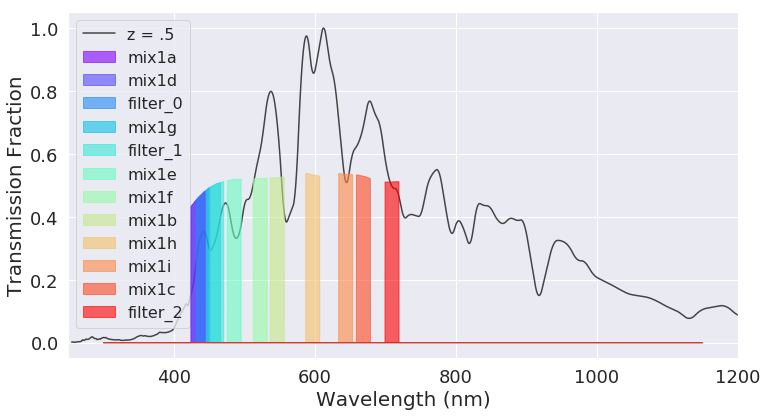

In [91]:
fig = plt.figure(figsize=(12, 14))
fig.add_subplot(2,1,1)
sig_plotmix1d.plot_filters(fig=fig)
ax = plt.gca()
ax.lines[0].set_alpha(0.8)
plt.xlabel('Wavelength (nm)', size=20)
plt.ylabel('Transmission Fraction', size=20)
plt.legend((['z = .5'] + sig_plotmix1d.filter_dict.keys()), 
           loc=0, fontsize=16)
plt.xticks(size=18)
plt.yticks(size=18)
#plt.savefig('Example_2.pdf')



In [92]:
#exp time = 15, 20nm, real prior
sig_plotmix1d.filter_dict.keys()

['mix1a',
 'mix1d',
 'filter_0',
 'mix1g',
 'filter_1',
 'mix1e',
 'mix1f',
 'mix1b',
 'mix1h',
 'mix1i',
 'mix1c',
 'filter_2']

In [93]:
f0 = sig_plotmix1d.filter_dict['filter_0']
f0.writeThroughput('Filter_Saves/total_mix1j.dat')

In [94]:
f1 = sig_plotmix1d.filter_dict['filter_1']
f1.writeThroughput('Filter_Saves/total_mix1k.dat')

In [95]:
f2 = sig_plotmix1d.filter_dict['filter_2']
f2.writeThroughput('Filter_Saves/total_mix1l.dat')

In [96]:
saved_frozen_dict1d = BandpassDict.loadTotalBandpassesFromFiles(bandpassDir='Filter_Saves', bandpassNames = ['mix1a','mix1b','mix1c','mix1d','mix1e','mix1f','mix1g','mix1h','mix1i','mix1j','mix1k','mix1l'], bandpassRoot = 'total_')

In [97]:
saved_frozen_dict1d.keys()

['mix1a',
 'mix1b',
 'mix1c',
 'mix1d',
 'mix1e',
 'mix1f',
 'mix1g',
 'mix1h',
 'mix1i',
 'mix1j',
 'mix1k',
 'mix1l']

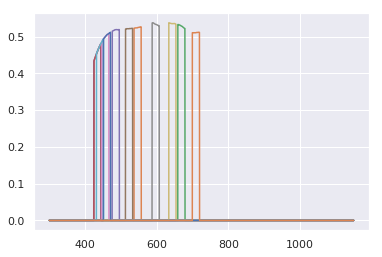

In [98]:
plt.plot(saved_frozen_dict1d['mix1a'].wavelen,saved_frozen_dict1d['mix1a'].sb)
plt.plot(saved_frozen_dict1d['mix1b'].wavelen,saved_frozen_dict1d['mix1b'].sb)
plt.plot(saved_frozen_dict1d['mix1c'].wavelen,saved_frozen_dict1d['mix1c'].sb)
plt.plot(saved_frozen_dict1d['mix1d'].wavelen,saved_frozen_dict1d['mix1d'].sb)
plt.plot(saved_frozen_dict1d['mix1e'].wavelen,saved_frozen_dict1d['mix1e'].sb)
plt.plot(saved_frozen_dict1d['mix1f'].wavelen,saved_frozen_dict1d['mix1f'].sb)
plt.plot(saved_frozen_dict1d['mix1g'].wavelen,saved_frozen_dict1d['mix1g'].sb)
plt.plot(saved_frozen_dict1d['mix1h'].wavelen,saved_frozen_dict1d['mix1h'].sb)
plt.plot(saved_frozen_dict1d['mix1i'].wavelen,saved_frozen_dict1d['mix1i'].sb)
plt.plot(saved_frozen_dict1d['mix1j'].wavelen,saved_frozen_dict1d['mix1j'].sb)
plt.plot(saved_frozen_dict1d['mix1k'].wavelen,saved_frozen_dict1d['mix1k'].sb)
plt.plot(saved_frozen_dict1d['mix1l'].wavelen,saved_frozen_dict1d['mix1l'].sb)

# Treat As Comb, Test with LSST

In [99]:
total_comb_filt_mix1 = filterFactory.create_filter_object('comb')

In [100]:
total_comb_filt_mix1.set_wavelen_grid()

In [101]:
set_ratio = 1.0
set_width = 20
comb_dict1 = total_comb_filt_mix1.create_filter_dict_from_shape_params(set_ratio, set_width,
                    [best_ptmix1[0]-10,best_ptmix1[1]-10,best_ptmix1[2]-10,
                    best_ptmix1b[0]-10,best_ptmix1b[1]-10,best_ptmix1b[2]-10,
                    best_ptmix1c[0]-10,best_ptmix1c[1]-10,best_ptmix1c[2]-10,
                    best_ptmix1d[0]-10,best_ptmix1d[1]-10,best_ptmix1d[2]-10])
comb_dict1._bandpassDict['filter_1'] = comb_dict1['filter_0']
del(comb_dict1._bandpassDict['filter_0'])

Text(0, 0.5, 'Transmission Fraction')

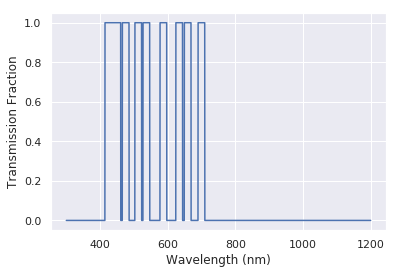

In [102]:
plt.plot(comb_dict1['filter_1'].wavelen,
         comb_dict1['filter_1'].sb)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmission Fraction')

In [103]:
hardware_filt_dict, total_filt_dict = BandpassDict.addSystemBandpass(comb_dict1)

In [104]:
total_comb_filt_mix1.find_filt_centers(total_filt_dict)

[541.2000000000548]

In [105]:
filts = np.array([best_ptmix1[0],best_ptmix1[1],best_ptmix1[2],
                    best_ptmix1b[0],best_ptmix1b[1],best_ptmix1b[2],
                    best_ptmix1c[0],best_ptmix1c[1],best_ptmix1c[2],
                    best_ptmix1d[0],best_ptmix1d[1],best_ptmix1d[2]])
print(filts)
pickle.dump(filts, open( "filts_mix_nofroz", "wb" ) )

[424.09817748 536.5047447  658.76617212 424.53840038 475.41399114
 512.55516608 446.22839042 586.87290065 633.61088829 431.4576051
 450.72347328 699.31587315]


In [106]:
#f0 = sig_plotmix1d.filter_dict['filter_0']
fcomb = comb_dict1['filter_1']
fcomb.writeThroughput('Filter_Saves/total_comb_filt_mix1.dat')

In [107]:
comb_mix_withLSST_dict = BandpassDict.loadTotalBandpassesFromFiles(bandpassDir='Filter_Saves', bandpassNames = ['comb_filt_mix1','u','g','r','i','z','y'], bandpassRoot = 'total_')

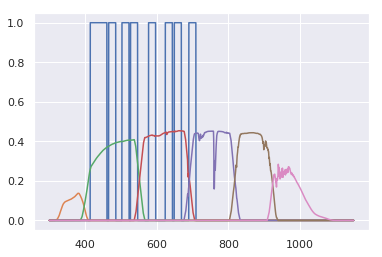

In [108]:
plt.plot(comb_mix_withLSST_dict['comb_filt_mix1'].wavelen,comb_mix_withLSST_dict['comb_filt_mix1'].sb)
plt.plot(comb_mix_withLSST_dict['u'].wavelen,comb_mix_withLSST_dict['u'].sb)
plt.plot(comb_mix_withLSST_dict['g'].wavelen,comb_mix_withLSST_dict['g'].sb)
plt.plot(comb_mix_withLSST_dict['r'].wavelen,comb_mix_withLSST_dict['r'].sb)
plt.plot(comb_mix_withLSST_dict['i'].wavelen,comb_mix_withLSST_dict['i'].sb)
plt.plot(comb_mix_withLSST_dict['z'].wavelen,comb_mix_withLSST_dict['z'].sb)
plt.plot(comb_mix_withLSST_dict['y'].wavelen,comb_mix_withLSST_dict['y'].sb)

In [109]:
#initialize rand state with def seed
#rand_state_1ea = np.random.RandomState(2005)
#rand_state_1eb = np.random.RandomState(2008)
rand_state_1e = np.random.RandomState(2005)

In [110]:
#Uniformly generate 10,000 redshifts
#z_list1ea = rand_state_1ea.uniform(0,.76,size=5000)
#z_list1eb = rand_state_1eb.uniform(0,.76,size=5000)
z_list1e = rand_state_1e.uniform(0,.76,size=10000)
#Uniformly generate 10,000 calibration magnitudes
#mag_list1ea = rand_state_1ea.uniform(18,24,size=5000)
#mag_list1eb = rand_state_1eb.uniform(18,24,size=5000)
mag_list1e = rand_state_1e.uniform(18,24,size=10000)

In [111]:
len(z_list1e)

10000

In [112]:
#z_list1e = np.append(z_list1ea, z_list1eb)
#random.shuffle(z_list1e)
#len(z_list1e)

#mag_list1e = np.append(mag_list1ea, mag_list1eb)
#random.shuffle(mag_list1e)
#len(mag_list1e)

In [113]:
def Normalize_SED(calib_filter, calib_mag, z, SED):
    copySED = deepcopy(SED)
    copySED.redshiftSED(z)
    fluxnorm = copySED.calcFluxNorm(calib_mag, calib_filter)
    copySED.multiplyFluxNorm(fluxnorm)
    return copySED


In [114]:
SED_list1ea = []
for z, mag in zip(z_list1e[0:5000], mag_list1e[0:5000]):
    copySED = Normalize_SED(bp_dict['r'],mag,z,salt2_spec)
    SED_list1ea.append(copySED)
    

In [115]:
SED_list1eb = []
for z, mag in zip(z_list1e[5000:10000], mag_list1e[5000:10000]):
    copySED = Normalize_SED(bp_dict['r'],mag,z,sna7pg_specnew)
    SED_list1eb.append(copySED)
    

In [117]:
len(SED_list1eb)

5000

In [118]:
SED_list1e = np.append(SED_list1ea, SED_list1eb)

In [119]:
len(SED_list1e)

10000

In [120]:
#pickle.dump(SED_list1e, open( "SED_list_1", "wb" ) )

In [121]:
c = calcIG(comb_mix_withLSST_dict, sig_example.shift_seds, sig_example.z_probs,
                   sig_example.z_vals,
                   sky_mag=sig_example.sky_mag,
                   ref_filter=sig_example.calib_filter,
                   phot_params=sig_example.phot_params)

In [122]:
color_list1e = []
color_error1e = []
for SED in SED_list1e:
    colors, colorerrors, snr, mags, magerrors, skymags = c.calc_colors([SED],return_all=True)
    color_list1e.append(colors)
    color_error1e.append(colorerrors)
    
    

In [123]:
#c.calc_colors??

In [124]:
len(colors[0])

6

In [126]:
len(color_list1e)

10000

In [127]:
color_error_rand_state1e = np.random.RandomState(1969)

In [128]:
errors_1e = color_error_rand_state1e.normal(scale = color_error1e)

In [129]:
len(errors_1e)

10000

In [130]:
colors_w_noise1e = []
for x,y in zip(color_list1e,errors_1e):
    colors_w_noise1e.append(x+y)

In [131]:
cmnn_thresh_table = np.zeros( 12, dtype='float' )
for i in range(12):
    cmnn_thresh_table[i] = chi2.ppf(.68,i)
cmnn_thresh_table[0] = float(0.0000)

In [132]:
colors_w_noise1e[8000]

array([[-1.20957415,  1.16623682,  0.10785796,  0.36223876, -0.43654813,
         0.37558746]])

In [163]:
color_list1ea = color_list1e[1000:5000]
color_list1eb = color_list1e[6000:10000]
color_list1 = np.append(color_list1ea,color_list1eb)
len(color_list1)

48000

In [165]:
z_list1ea = z_list1e[1000:5000]
z_list1eb = z_list1e[6000:10000]
z_list1 = np.append(z_list1ea,z_list1eb)

In [166]:
ranga = np.arange(0,1000,1)
#print(ranga)
rangb = np.arange(5000,6000)
#print(rangb)
rang1 = np.append(ranga,rangb)
len(rang1)

2000

In [167]:
#return_photoz??

In [168]:
num_colors = len(colors[0])
photoz_list1e = []
photoz_error_list1e = []
Ncm_list1e = []
for i in rang1:
    photoz,photoz_error,Ncm = return_photoz(np.array(colors_w_noise1e[i]), np.array(errors_1e[i]), np.array(color_list1).reshape((8000,num_colors)),
        np.array(z_list1), .68, cmnn_thresh_table, 0, num_colors, 1)
    photoz_list1e.append(photoz)
    photoz_error_list1e.append(photoz_error)
    Ncm_list1e.append(Ncm)

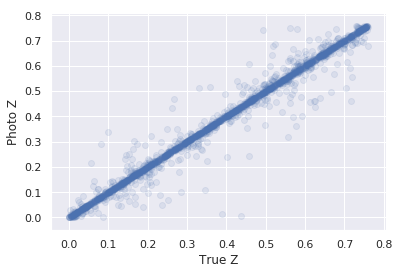

In [175]:
for i,y in zip(rang1,np.arange(0,2000,1)):
    plt.scatter(z_list1e[i],photoz_list1e[y],alpha=.1,c='b')
    plt.xlabel('True Z')
    plt.ylabel('Photo Z')

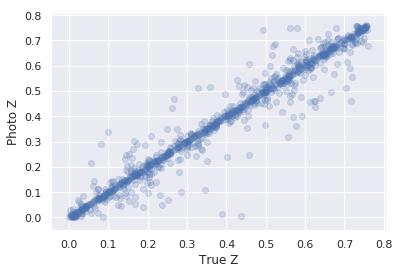

In [180]:
#for i in ranga:#np.arange(0,2000,1):
for i,y in zip(rang1,np.arange(0,2000,1)):
    if mag_list1e[i] > 21:
        plt.scatter(z_list1e[i],photoz_list1e[y],alpha=.2,c='b')
        plt.xlabel('True Z')
        plt.ylabel('Photo Z')
        

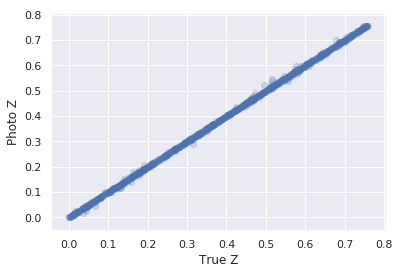

In [182]:
#for i in ranga:#np.arange(0,2000,1):
for i,y in zip(rang1,np.arange(0,2000,1)):
    if mag_list1e[i] < 21:
        plt.scatter(z_list1e[i],photoz_list1e[y],alpha=.2,c='b')
        plt.xlabel('True Z')
        plt.ylabel('Photo Z')

# Treat As Comb, Test with LSST, Diff Times

In [115]:
total_comb_filt_mix1 = filterFactory.create_filter_object('comb')

In [116]:
total_comb_filt_mix1.set_wavelen_grid()

In [117]:
set_ratio = 1.0
set_width = 20
comb_dict1 = total_comb_filt_mix1.create_filter_dict_from_shape_params(set_ratio, set_width,
                    [best_ptmix1[0]-10,best_ptmix1[1]-10,best_ptmix1[2]-10,
                    best_ptmix1b[0]-10,best_ptmix1b[1]-10,best_ptmix1b[2]-10,
                    best_ptmix1c[0]-10,best_ptmix1c[1]-10,best_ptmix1c[2]-10,
                    best_ptmix1d[0]-10,best_ptmix1d[1]-10,best_ptmix1d[2]-10])
comb_dict1._bandpassDict['filter_1'] = comb_dict1['filter_0']
del(comb_dict1._bandpassDict['filter_0'])

Text(0, 0.5, 'Transmission Fraction')

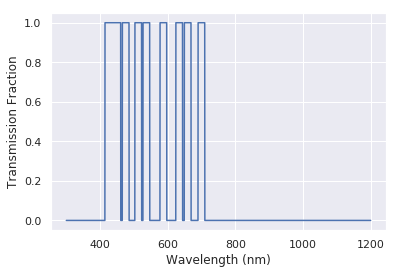

In [118]:
plt.plot(comb_dict1['filter_1'].wavelen,
         comb_dict1['filter_1'].sb)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmission Fraction')

In [119]:
hardware_filt_dict, total_filt_dict = BandpassDict.addSystemBandpass(comb_dict1)

In [120]:
total_comb_filt_mix1.find_filt_centers(total_filt_dict)

[541.2000000000548]

In [121]:
filts = np.array([best_ptmix1[0],best_ptmix1[1],best_ptmix1[2],
                    best_ptmix1b[0],best_ptmix1b[1],best_ptmix1b[2],
                    best_ptmix1c[0],best_ptmix1c[1],best_ptmix1c[2],
                    best_ptmix1d[0],best_ptmix1d[1],best_ptmix1d[2]])
print(filts)
pickle.dump(filts, open( "filts_mix_nofroz", "wb" ) )

[424.09817748 536.5047447  658.76617212 424.53840038 475.41399114
 512.55516608 446.22839042 586.87290065 633.61088829 431.4576051
 450.72347328 699.31587315]


In [122]:
#f0 = sig_plotmix1d.filter_dict['filter_0']
fcomb = comb_dict1['filter_1']
fcomb.writeThroughput('Filter_Saves/total_comb_filt_mix1.dat')

In [123]:
comb_mix_withLSST_dict = BandpassDict.loadTotalBandpassesFromFiles(bandpassDir='Filter_Saves', bandpassNames = ['comb_filt_mix1','u','g','r','i','z','y'], bandpassRoot = 'total_')

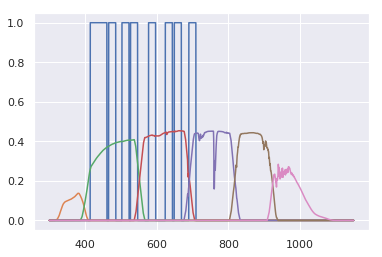

In [124]:
plt.plot(comb_mix_withLSST_dict['comb_filt_mix1'].wavelen,comb_mix_withLSST_dict['comb_filt_mix1'].sb)
plt.plot(comb_mix_withLSST_dict['u'].wavelen,comb_mix_withLSST_dict['u'].sb)
plt.plot(comb_mix_withLSST_dict['g'].wavelen,comb_mix_withLSST_dict['g'].sb)
plt.plot(comb_mix_withLSST_dict['r'].wavelen,comb_mix_withLSST_dict['r'].sb)
plt.plot(comb_mix_withLSST_dict['i'].wavelen,comb_mix_withLSST_dict['i'].sb)
plt.plot(comb_mix_withLSST_dict['z'].wavelen,comb_mix_withLSST_dict['z'].sb)
plt.plot(comb_mix_withLSST_dict['y'].wavelen,comb_mix_withLSST_dict['y'].sb)

In [125]:
#initialize rand state with def seed
#rand_state_1ea = np.random.RandomState(2005)
#rand_state_1eb = np.random.RandomState(2008)
rand_state_1e = np.random.RandomState(2005)

In [126]:
#Uniformly generate 10,000 redshifts
#z_list1ea = rand_state_1ea.uniform(0,.76,size=5000)
#z_list1eb = rand_state_1eb.uniform(0,.76,size=5000)
z_list1e = rand_state_1e.uniform(0,.76,size=10000)
#Uniformly generate 10,000 calibration magnitudes
#mag_list1ea = rand_state_1ea.uniform(18,24,size=5000)
#mag_list1eb = rand_state_1eb.uniform(18,24,size=5000)
mag_list1e = rand_state_1e.uniform(18,24,size=10000)

In [127]:
len(z_list1e)

10000

In [128]:
#z_list1e = np.append(z_list1ea, z_list1eb)
#random.shuffle(z_list1e)
#len(z_list1e)

#mag_list1e = np.append(mag_list1ea, mag_list1eb)
#random.shuffle(mag_list1e)
#len(mag_list1e)

In [129]:
def Normalize_SED(calib_filter, calib_mag, z, SED):
    copySED = deepcopy(SED)
    copySED.redshiftSED(z)
    fluxnorm = copySED.calcFluxNorm(calib_mag, calib_filter)
    copySED.multiplyFluxNorm(fluxnorm)
    return copySED


In [130]:
SED_list1ea = []
for z, mag in zip(z_list1e[0:2500], mag_list1e[0:2500]):
    copySED = Normalize_SED(bp_dict['r'],mag,z,salt2_05_spec)
    SED_list1ea.append(copySED)
    

In [131]:
SED_list1eb = []
for z, mag in zip(z_list1e[2500:5000], mag_list1e[2500:5000]):
    copySED = Normalize_SED(bp_dict['r'],mag,z,salt2_neg05_spec)
    SED_list1eb.append(copySED)
    

In [132]:
SED_list1ec = []
for z, mag in zip(z_list1e[5000:7500], mag_list1e[5000:7500]):
    copySED = Normalize_SED(bp_dict['r'],mag,z,sna7pg_specnew_05)
    SED_list1ec.append(copySED)
    

In [133]:
SED_list1ed = []
for z, mag in zip(z_list1e[7500:10000], mag_list1e[7500:10000]):
    copySED = Normalize_SED(bp_dict['r'],mag,z,sna7pg_specnew_neg05)
    SED_list1ed.append(copySED)
    

In [134]:
len(SED_list1ed)

2500

In [135]:
SED_list1e1 = np.append(SED_list1ea, SED_list1eb)

In [136]:
SED_list1e2 = np.append(SED_list1ec, SED_list1ed)

In [137]:
SED_list1e = np.append(SED_list1e1, SED_list1e2)

In [138]:
len(SED_list1e)

10000

In [139]:
#pickle.dump(SED_list1e, open( "SED_list_1", "wb" ) )

In [140]:
c = calcIG(comb_mix_withLSST_dict, sig_example.shift_seds, sig_example.z_probs,
                   sig_example.z_vals,
                   sky_mag=sig_example.sky_mag,
                   ref_filter=sig_example.calib_filter,
                   phot_params=sig_example.phot_params)

In [141]:
color_list1e = []
color_error1e = []
snr_list1e = []
for SED in SED_list1e:
    colors, colorerrors, snr, mags, magerrors, skymags = c.calc_colors([SED],return_all=True)
    color_list1e.append(colors)
    color_error1e.append(colorerrors)
    snr_list1e.append(snr)
    
    

In [142]:
len(snr_list1e[0])

1

In [143]:
len(colors[0])

6

In [144]:
len(color_list1e)

10000

In [145]:
color_error_rand_state1e = np.random.RandomState(1969)

In [146]:
errors_1e = color_error_rand_state1e.normal(scale = color_error1e)

In [147]:
len(errors_1e)

10000

In [148]:
colors_w_noise1e = []
for x,y in zip(color_list1e,errors_1e):
    colors_w_noise1e.append(x+y)

In [149]:
cmnn_thresh_table = np.zeros( 12, dtype='float' )
for i in range(12):
    cmnn_thresh_table[i] = chi2.ppf(.68,i)
cmnn_thresh_table[0] = float(0.0000)

In [150]:
colors_w_noise1e[8000]

array([[-1.48564511,  1.35656189,  0.19559198,  0.39573248, -0.30606486,
         0.26915233]])

In [151]:
color_list1ea = color_list1e[500:2500]
color_list1eb = color_list1e[3000:5000]
color_list1ec = color_list1e[5500:7500]
color_list1ed = color_list1e[8000:10000]
color_list1_1 = np.append(color_list1ea,color_list1eb)
color_list1_2 = np.append(color_list1ec,color_list1ed)
color_list1 = np.append(color_list1_1,color_list1_2)
len(color_list1)

48000

In [152]:
z_list1ea = z_list1e[500:2500]
z_list1eb = z_list1e[3000:5000]
z_list1ec = z_list1e[5500:7500]
z_list1ed = z_list1e[8000:10000]
z_list1_1 = np.append(z_list1ea,z_list1eb)
z_list1_2 = np.append(z_list1ec,z_list1ed)
z_list1 = np.append(z_list1_1,z_list1_2)
len(z_list1)

8000

In [153]:
ranga = np.arange(0,500,1)
#print(ranga)
rangb = np.arange(2500,3000)
#print(rangb)
rangc = np.arange(5000,5500,1)
#print(rangc)
rangd = np.arange(7500,8000)
#print(rangd)
rang1_1 = np.append(ranga,rangb)
rang1_2 = np.append(rangc,rangd)
rang1 = np.append(rang1_1,rang1_2)
len(rang1)

2000

In [154]:
print(rang1)

[   0    1    2 ... 7997 7998 7999]


In [155]:
num_colors = len(colors[0])
photoz_list1e = []
photoz_error_list1e = []
Ncm_list1e = []
for i in rang1:
    photoz,photoz_error,Ncm = return_photoz(np.array(colors_w_noise1e[i]), np.array(errors_1e[i]), np.array(color_list1).reshape((8000,num_colors)),
        np.array(z_list1), .68, cmnn_thresh_table, 0, num_colors, 1)
    photoz_list1e.append(photoz)
    photoz_error_list1e.append(photoz_error)
    Ncm_list1e.append(Ncm)

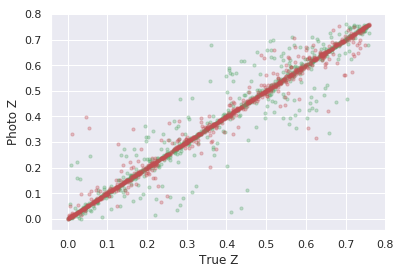

In [156]:
for i,y in zip(rang1,np.arange(0,2000,1)):
    if i <= 3000:
        plt.scatter(z_list1e[i],photoz_list1e[y],alpha=.3,c='g',s=10) #type Ia
        plt.xlabel('True Z')
        plt.ylabel('Photo Z')
    else:
        plt.scatter(z_list1e[i],photoz_list1e[y],alpha=.3,c='r',s=10) #type II
        plt.xlabel('True Z')
        plt.ylabel('Photo Z')

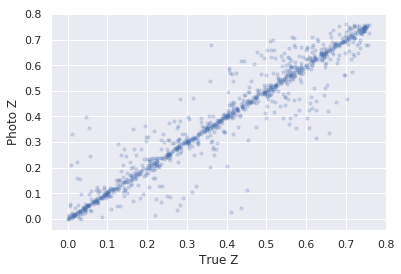

In [157]:
#for i in ranga:#np.arange(0,2000,1):
for i,y in zip(rang1,np.arange(0,2000,1)):
    if mag_list1e[i] > 21:
        plt.scatter(z_list1e[i],photoz_list1e[y],alpha=.2,c='b',s=10)
        plt.xlabel('True Z')
        plt.ylabel('Photo Z')
        

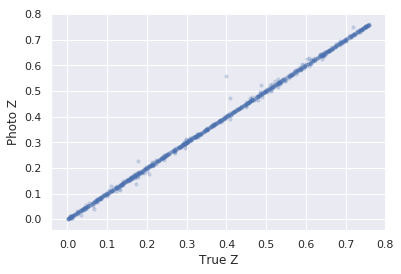

In [158]:
#for i in ranga:#np.arange(0,2000,1):
for i,y in zip(rang1,np.arange(0,2000,1)):
    if mag_list1e[i] < 21:
        plt.scatter(z_list1e[i],photoz_list1e[y],alpha=.2,c='b',s=10)
        plt.xlabel('True Z')
        plt.ylabel('Photo Z')

In [159]:
print(snr_list1e)

[[[564.6851350290126, 39.304310379580734, 322.71956232354677, 293.38335985243407, 213.62116572496618, 117.06560310804504, 37.6713680593389]], [[235.0068776115002, 1.5448602537790803, 75.78890696926169, 172.47935808423537, 163.67819512346284, 97.7326247434713, 33.99186838679158]], [[157.9873813071256, 7.589218959568154, 92.93389009403597, 72.53769477465731, 45.47570482834871, 19.857157079043237, 5.9319793724058485]], [[17.746381198513006, 0.07646323790012813, 6.978452243271281, 12.628508016249832, 8.64839285871366, 4.759337376828987, 1.30770879689898]], [[115.90382584010004, 0.6011733534747408, 38.69323929991736, 86.14088667690727, 63.80081352557793, 38.36553525034131, 11.959055893501217]], [[344.33689491045, 12.598096221265614, 196.3844996978663, 183.86238054814427, 136.72518998598503, 75.50361896007908, 19.463949593527364]], [[17.673753126768503, 0.0724656332775324, 7.046428074707549, 11.809665668706721, 7.864251013666713, 4.430799678922735, 1.1995670894769308]], [[6.736143536120871, 

In [160]:
snr_list1e_tot = []
for i in np.arange(0,1000,1):
    snr_list1e_tot.append(snr_list1e[i])
print(snr_list1e_tot[0])

[[564.6851350290126, 39.304310379580734, 322.71956232354677, 293.38335985243407, 213.62116572496618, 117.06560310804504, 37.6713680593389]]


In [161]:
snr_comb = []
for i in np.arange(0,10000,1):
    snr_comb.append(snr_list1e[i][0][0])

(array([4128., 1416.,  929.,  721.,  542.,  503.,  418.,  394.,  342.,
         272.,  157.,  108.,   56.,   14.,    0.]),
 array([  0,  50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600,
        650, 700, 750]),
 <a list of 15 Patch objects>)

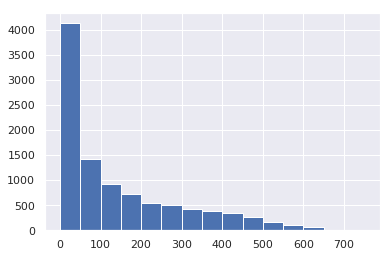

In [162]:
plt.hist(snr_comb,bins=[0,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750])

In [169]:
len(snr_comb)

10000

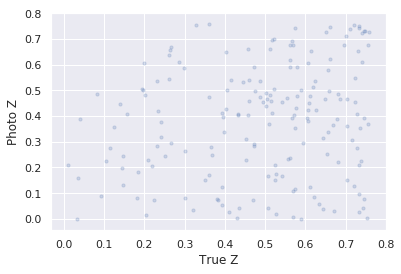

In [168]:
#snr <= 10
for i,y in zip(np.arange(0,10000,1),np.arange(0,2000,1)):
    if snr_comb[i] < 10:
        plt.scatter(z_list1e[i],photoz_list1e[y],alpha=.2,c='b',s=10)
        plt.xlabel('True Z')
        plt.ylabel('Photo Z')